# 1	Part 1 - Building up a basic predictive model

## Importing the libraries

In [273]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plb

from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, feature_selection, linear_model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Importing the dataset

In [274]:
# loading the dataset into a pandas dataframe
df = pd.read_csv("Manhattan12.csv")

In [275]:
# showing the first 5 rows in a dataframe
df.head(5)

BOROUGH               NEIGHBORHOOD  \
0        1                              
1        1                              
2        1                              
3        1                              
4        1                              

                        BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0  13  CONDOS - ELEVATOR APARTMENTS                                     738   
1  13  CONDOS - ELEVATOR APARTMENTS                                     738   
2  13  CONDOS - ELEVATOR APARTMENTS                                     738   
3  13  CONDOS - ELEVATOR APARTMENTS                                     738   
4  13  CONDOS - ELEVATOR APARTMENTS                                     738   

    LOT EASE-MENT BUILDING CLASS AT PRESENT  \
0  1306                                       
1  1307                                       
2  1308                                       
3  1309                                       
4  1310                                       

                                       ADDRESS APART\nMENT\nNUMBER  ...  \
0   345 WEST 14TH   STREET                                          ...   
1   345 WEST 14TH   STREET                                          ...   
2   345 WEST 14TH   STREET                                          ...   
3   345 WEST 14TH   STREET                                          ...   
4   345 WEST 14TH   STREET                                          ...   

   RESIDENTIAL UNITS COMMERCIAL UNITS  TOTAL UNITS LAND SQUARE FEET  \
0                  0                0            0                0   
1                  0                0            0                0   
2                  0                0            0                0   
3                  0                0            0                0   
4                  0                0            0                0   

  GROSS SQUARE FEET YEAR BUILT  TAX CLASS AT TIME OF SALE  \
0                 0          0                          2   
1                 0          0                          2   
2                 0          0                          2   
3                 0          0                          2   
4                 0          0                          2   

   BUILDING CLASS AT TIME OF SALE   SALE DATE SALE\nPRICE  
0                             R4   20/05/2013  $2,214,693  
1                             R4   16/05/2013  $1,654,656  
2                             R4   23/05/2013  $1,069,162  
3                             R4   15/05/2013  $1,374,637  
4                             R4   13/05/2013  $1,649,565  

[5 rows x 21 columns]

In [276]:
# showing the last 10 rows in a dataframe
df.tail(10)

BOROUGH               NEIGHBORHOOD  \
27385        1  WASHINGTON HEIGHTS UPPER    
27386        1  WASHINGTON HEIGHTS UPPER    
27387        1  WASHINGTON HEIGHTS UPPER    
27388        1  WASHINGTON HEIGHTS UPPER    
27389        1  WASHINGTON HEIGHTS UPPER    
27390        1  WASHINGTON HEIGHTS UPPER    
27391        1  WASHINGTON HEIGHTS UPPER    
27392        1  WASHINGTON HEIGHTS UPPER    
27393        1  WASHINGTON HEIGHTS UPPER    
27394        1  WASHINGTON HEIGHTS UPPER    

                            BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
27385  29  COMMERCIAL GARAGES                                          4   
27386  29  COMMERCIAL GARAGES                                          4   
27387  31  COMMERCIAL VACANT LAND                                      4   
27388  31  COMMERCIAL VACANT LAND                                      4   
27389  31  COMMERCIAL VACANT LAND                                      4   
27390  31  COMMERCIAL VACANT LAND                                      4   
27391  31  COMMERCIAL VACANT LAND                                      4   
27392  31  COMMERCIAL VACANT LAND                                      4   
27393  31  COMMERCIAL VACANT LAND                                      4   
27394  31  COMMERCIAL VACANT LAND                                      4   

       BLOCK  LOT EASE-MENT BUILDING CLASS AT PRESENT  \
27385   2170   32                                  G7   
27386   2246   43                                  G1   
27387   2155   89                                  V1   
27388   2170   26                                  V1   
27389   2170   26                                  V1   
27390   2170  400                                  V1   
27391   2180   75                                  V1   
27392   2180   75                                  V1   
27393   2180   76                                  V1   
27394   2180   76                                  V1   

                                           ADDRESS APART\nMENT\nNUMBER  ...  \
27385   667 WEST 187 STREET                                             ...   
27386   270 DYCKMAN STREET                                              ...   
27387   2494 AMSTERDAM AVENUE                                           ...   
27388   653 WEST 187TH STREET                                           ...   
27389   653 WEST 187 STREET                                             ...   
27390   44 FAIRVIEW AVENUE                                              ...   
27391   BENNETT AVENUE                                                  ...   
27392   BENNETT AVENUE                                                  ...   
27393   N/A MAGAW PLACE                                                 ...   
27394   MAGAW PLACE                                                     ...   

       RESIDENTIAL UNITS COMMERCIAL UNITS  TOTAL UNITS LAND SQUARE FEET  \
27385                  0                0            0            4,496   
27386                  0                2            2           14,980   
27387                  0                0            0            3,100   
27388                  0                0            0            1,582   
27389                  0                0            0            1,582   
27390                  0                0            0           16,217   
27391                  0                0            0            4,150   
27392                  0                0            0            4,150   
27393                  0                0            0              760   
27394                  0                0            0              760   

      GROSS SQUARE FEET YEAR BUILT  TAX CLASS AT TIME OF SALE  \
27385                 0          0                          4   
27386            46,200       1929                          4   
27387                 0          0                          4   
27388                 0          0                          4   
27389                 0  

## 1.1 Data cleaning and transformation: 

In [277]:
#shape of dataset
df.shape

(27395, 21)

In [278]:
# info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27395 entries, 0 to 27394
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         27395 non-null  int64 
 1   NEIGHBORHOOD                    27395 non-null  object
 2   BUILDING CLASS CATEGORY         27395 non-null  object
 3   TAX CLASS AT PRESENT            27395 non-null  object
 4   BLOCK                           27395 non-null  int64 
 5   LOT                             27395 non-null  int64 
 6   EASE-MENT                       27395 non-null  object
 7   BUILDING CLASS AT PRESENT       27395 non-null  object
 8   ADDRESS                         27395 non-null  object
 9   APART
MENT
NUMBER               27395 non-null  object
 10  ZIP CODE                        27395 non-null  int64 
 11  RESIDENTIAL UNITS               27395 non-null  object
 12  COMMERCIAL UNITS                27395 non-null

In [279]:
# renaming incorrectly formatted column names to the required format using rename function
df.rename(columns={"SALE\nPRICE" : "SALE PRICE","APART\nMENT\nNUMBER" : "APARTMENT NUMBER"},inplace=True)

In [280]:
# showing the datatypes of columns using df.dtypes
df.dtypes

BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                 object
COMMERCIAL UNITS                   int64
TOTAL UNITS                       object
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE DATE                         object
SALE PRICE                        object
dtype: object

In [281]:
# creating the list of categorical variables in a category list
category = df.select_dtypes("object").columns.tolist()

# creating the list of numerical variables in a continuous list
continuous = df.select_dtypes("number").columns.tolist()

In [282]:
# print the list of columns in category
print(category)

['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'RESIDENTIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'BUILDING CLASS AT TIME OF SALE', 'SALE DATE', 'SALE PRICE']


In [283]:
# print the list of columns in continuous
print(continuous)

['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'COMMERCIAL UNITS', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE']


In [284]:
# print the unique values from a 'RESIDENTIAL UNITS' column in a dataframe
print(df['RESIDENTIAL UNITS'].unique())

['0' '3' '1' '8' '20' '13' '10' '7' '17' '25' '9' '36' '18' '28' '35' '12'
 '26' '61' '4' '2' '5' '6' '16' '11' '15' '19' '14' '59' '21' '68' '42'
 '34' '23' '134' '162' '24' '48' '30' '22' '180' '32' '133' '39' '65' '56'
 '538' '66' '31' '255' '157' '91' '55' '70' '46' '47' '54' '92' '85' '52'
 '90' '117' '27' '33' '29' '123' '84' '522' '63' '89' '53' '43' '62' '37'
 '67' '64' '130' '60' '41' '44' '202' '94' '510' '128' '50' '58' '49'
 '192' '105' '161' '334' '113' '120' '40' '397' '102' '300' '904' '1,328'
 '172' '51' '177' '126' '165' '188' '163' '229' '209' '147' '114' '274'
 '658' '109' '136' '81' '76' '146' '197' '80' '45' '75' '69']


In [285]:
# replacing the comma ',' with empty string '' in 'RESIDENTIAL UNITS' column
df['RESIDENTIAL UNITS'].replace(',','', regex=True, inplace=True)

In [286]:
# print the unique values from a 'RESIDENTIAL UNITS' column in a dataframe after replacing all values from ',' to '' 
print(df['RESIDENTIAL UNITS'].unique())

['0' '3' '1' '8' '20' '13' '10' '7' '17' '25' '9' '36' '18' '28' '35' '12'
 '26' '61' '4' '2' '5' '6' '16' '11' '15' '19' '14' '59' '21' '68' '42'
 '34' '23' '134' '162' '24' '48' '30' '22' '180' '32' '133' '39' '65' '56'
 '538' '66' '31' '255' '157' '91' '55' '70' '46' '47' '54' '92' '85' '52'
 '90' '117' '27' '33' '29' '123' '84' '522' '63' '89' '53' '43' '62' '37'
 '67' '64' '130' '60' '41' '44' '202' '94' '510' '128' '50' '58' '49'
 '192' '105' '161' '334' '113' '120' '40' '397' '102' '300' '904' '1328'
 '172' '51' '177' '126' '165' '188' '163' '229' '209' '147' '114' '274'
 '658' '109' '136' '81' '76' '146' '197' '80' '45' '75' '69']


In [287]:
# print the unique values from a 'TOTAL UNITS' column in a dataframe
print(df['TOTAL UNITS'].unique())

['0' '1' '3' '10' '20' '13' '8' '17' '27' '39' '9' '18' '30' '28' '40'
 '12' '62' '4' '5' '2' '6' '16' '11' '15' '19' '14' '59' '31' '22' '68'
 '44' '34' '24' '134' '7' '77' '43' '21' '29' '162' '26' '38' '48' '23'
 '35' '604' '52' '47' '60' '50' '180' '25' '137' '36' '41' '65' '119' '56'
 '550' '66' '37' '255' '159' '91' '72' '51' '54' '93' '85' '90' '123' '84'
 '526' '63' '89' '53' '70' '67' '42' '64' '130' '32' '211' '94' '511' '45'
 '33' '128' '46' '58' '49' '200' '105' '80' '161' '334' '115' '125' '150'
 '111' '398' '112' '106' '311' '71' '904' '1,349' '171' '181' '194' '127'
 '173' '195' '165' '230' '213' '149' '114' '277' '658' '109' '61' '136'
 '81' '202' '76' '146' '197' '55' '75' '74' '57']


In [288]:
# replacing the comma ',' with empty string '' in 'TOTAL UNITS' column
df['TOTAL UNITS'].replace(',','', regex=True, inplace=True)

In [289]:
# print the unique values from a 'TOTAL UNITS' column in a dataframe after replacing all values from ',' to '' 
print(df['TOTAL UNITS'].unique())

['0' '1' '3' '10' '20' '13' '8' '17' '27' '39' '9' '18' '30' '28' '40'
 '12' '62' '4' '5' '2' '6' '16' '11' '15' '19' '14' '59' '31' '22' '68'
 '44' '34' '24' '134' '7' '77' '43' '21' '29' '162' '26' '38' '48' '23'
 '35' '604' '52' '47' '60' '50' '180' '25' '137' '36' '41' '65' '119' '56'
 '550' '66' '37' '255' '159' '91' '72' '51' '54' '93' '85' '90' '123' '84'
 '526' '63' '89' '53' '70' '67' '42' '64' '130' '32' '211' '94' '511' '45'
 '33' '128' '46' '58' '49' '200' '105' '80' '161' '334' '115' '125' '150'
 '111' '398' '112' '106' '311' '71' '904' '1349' '171' '181' '194' '127'
 '173' '195' '165' '230' '213' '149' '114' '277' '658' '109' '61' '136'
 '81' '202' '76' '146' '197' '55' '75' '74' '57']


In [290]:
# print the unique values from a 'LAND SQUARE FEET' column in a dataframe
print(df['LAND SQUARE FEET'].unique())

['0' '2,381' '1,501' ... '3,100' '16,217' '4,150']


In [291]:
# replacing the comma ',' with empty string '' in 'LAND SQUARE FEET' column
df['LAND SQUARE FEET'].replace(',','', regex=True, inplace=True)

In [292]:
# print the unique values from a 'LAND SQUARE FEET' column in a dataframe after replacing all values from ',' to '' 
print(df['LAND SQUARE FEET'].unique())

['0' '2381' '1501' ... '3100' '16217' '4150']


In [293]:
# print the unique values from a 'GROSS SQUARE FEET' column in a dataframe
print(df['GROSS SQUARE FEET'].unique())

['0' '3,084' '6,929' ... '6,438' '34,570' '2,465']


In [294]:
# replacing the comma ',' with empty string '' in 'GROSS SQUARE FEET' column
df['GROSS SQUARE FEET'].replace(',','', regex=True, inplace=True)

In [295]:
# print the unique values from a 'GROSS SQUARE FEET' column in a dataframe after replacing all values from ',' to '' 
print(df['GROSS SQUARE FEET'].unique())

['0' '3084' '6929' ... '6438' '34570' '2465']


In [296]:
# print the unique values from a 'SALE PRICE' column in a dataframe
print(df['SALE PRICE'].unique())

['$2,214,693' '$1,654,656' '$1,069,162' ... '$5,183,000' '$17,842'
 '$4,917,000']


In [297]:
# replacing the comma ',' with empty string '' in 'SALE PRICE' column
df['SALE PRICE'].replace(',', '', regex=True, inplace=True)

In [298]:
# print the unique values from a 'SALE PRICE' column in a dataframe after replacing all values from ',' to '' 
print(df['SALE PRICE'].unique())

['$2214693' '$1654656' '$1069162' ... '$5183000' '$17842' '$4917000']


In [299]:
# replacing the dollar sign '$' with empty string '' in 'SALE PRICE' column
df['SALE PRICE'].replace('\W', '', regex=True, inplace=True)

In [300]:
# print the unique values from a 'SALE PRICE' column in a dataframe after replacing all values from '$' to '' 
print(df['SALE PRICE'].unique())

['2214693' '1654656' '1069162' ... '5183000' '17842' '4917000']


In [301]:
# categorical columns which are numeric are added to 'cols' list
cols=['RESIDENTIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','SALE PRICE']

In [302]:
# print the list of 'cols' values
print(cols)

['RESIDENTIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']


In [303]:
# showing the datatypes of 'cols' values in a dataframe
df[cols].dtypes

RESIDENTIAL UNITS    object
TOTAL UNITS          object
LAND SQUARE FEET     object
GROSS SQUARE FEET    object
SALE PRICE           object
dtype: object

In [304]:
# Using for loop to convert the 'cols' list values to numeric datatypes in a dataframe
for col in cols:
    # using pd.to_numeric function to convert column into numeric type
    df[col]=pd.to_numeric(df[col],errors='coerce')

In [305]:
# Showing the datatypes of 'cols' values in a dataframe after converting them to numeric
df[cols].dtypes

RESIDENTIAL UNITS    int64
TOTAL UNITS          int64
LAND SQUARE FEET     int64
GROSS SQUARE FEET    int64
SALE PRICE           int64
dtype: object

In [306]:
# converting the 'SALE DATE' column of dtype 'object' to 'datetime64[ns]'
df['SALE DATE'] =  pd.to_datetime(df['SALE DATE'], infer_datetime_format=True)

In [307]:
# showing the datatypes of columns in a dataframe after converting 'SALE DATE' to datetime 
df.dtypes

BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
EASE-MENT                                 object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                   int64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                           int64
GROSS SQUARE FEET                          int64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE DATE                         datetime64[ns]
SALE PRICE          

In [308]:
# taking all categorical columns into a category list
category = df.select_dtypes("object").columns.tolist()
category.remove('EASE-MENT')

# taking all numerical columns into a numeric list
numeric = df.select_dtypes("number").columns.tolist()

In [309]:
# Using 'for' loop to iterate each value in category list
for col in category:
    #remove the whitespaces in the column using strip()
    df[col]=df[col].str.strip()
    # replace the empty string with NaN
    df[col].replace('', np.nan, inplace=True)

In [310]:
# showing the datatypes of columns in a dataframe after converting 'SALE DATE' to datetime 
df.dtypes

BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
EASE-MENT                                 object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                   int64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                           int64
GROSS SQUARE FEET                          int64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE DATE                         datetime64[ns]
SALE PRICE          

In [311]:
# summary of missing values in category columns in a data frame
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                         17
BUILDING CLASS CATEGORY            3454
TAX CLASS AT PRESENT                143
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT           143
ADDRESS                               0
APARTMENT NUMBER                  14570
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE DATE                             0
SALE PRICE                            0
dtype: int64

In [312]:
# Using 'for' loop to iterate each value in numeric list
for col in numeric:
    # replace the empty string with NaN
    df[col].replace(0, np.nan, inplace=True)

In [313]:
# showing the datatypes of columns in a dataframe after converting 'SALE DATE' to datetime 
df.dtypes

BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
EASE-MENT                                 object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                 float64
RESIDENTIAL UNITS                        float64
COMMERCIAL UNITS                         float64
TOTAL UNITS                              float64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                               float64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE DATE                         datetime64[ns]
SALE PRICE          

In [314]:
# summary of all missing values in each column in a data frame
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                         17
BUILDING CLASS CATEGORY            3454
TAX CLASS AT PRESENT                143
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT           143
ADDRESS                               0
APARTMENT NUMBER                  14570
ZIP CODE                              1
RESIDENTIAL UNITS                 16372
COMMERCIAL UNITS                  23962
TOTAL UNITS                        9704
LAND SQUARE FEET                  22906
GROSS SQUARE FEET                 23069
YEAR BUILT                         6441
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE DATE                             0
SALE PRICE                         7593
dtype: int64

In [315]:
# showing the datatypes of columns in a dataframe after converting 'SALE DATE' to datetime 
df.dtypes

BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
EASE-MENT                                 object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                 float64
RESIDENTIAL UNITS                        float64
COMMERCIAL UNITS                         float64
TOTAL UNITS                              float64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                               float64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE DATE                         datetime64[ns]
SALE PRICE          

In [316]:
# showing the summary statistics of each column in a dataframe
df.describe()

BOROUGH         BLOCK           LOT      ZIP CODE  RESIDENTIAL UNITS  \
count  27395.0  27395.000000  27395.000000  27394.000000       11023.000000   
mean       1.0   1109.666728    741.789086  10029.226217           4.390003   
std        0.0    465.994469    819.422424     34.966983          23.260831   
min        1.0      7.000000      1.000000  10001.000000           1.000000   
25%        1.0    877.000000     37.000000  10016.000000           1.000000   
50%        1.0   1047.000000   1007.000000  10019.000000           1.000000   
75%        1.0   1411.000000   1233.000000  10027.000000           1.000000   
max        1.0   2250.000000   9117.000000  10463.000000        1328.000000   

       COMMERCIAL UNITS   TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  \
count       3433.000000  17691.000000       4489.000000       4.326000e+03   
mean           2.992426      3.545249       5893.466028       6.061620e+04   
std           12.689861     19.482767       7884.729624       8.111694e+04   
min            1.000000      1.000000        200.000000       2.530000e+02   
25%            1.000000      1.000000       2104.000000       6.198500e+03   
50%            2.000000      1.000000       5046.000000       2.337150e+04   
75%            2.000000      1.000000       7532.000000       1.128500e+05   
max          604.000000   1349.000000     213650.000000       1.970736e+06   

         YEAR BUILT  TAX CLASS AT TIME OF SALE    SALE PRICE  
count  20954.000000               27395.000000  1.980200e+04  
mean    1953.080557                   2.488118  2.556609e+06  
std       37.692641                   0.891723  1.916295e+07  
min     1000.000000                   1.000000  1.000000e+00  
25%     1920.000000                   2.000000  3.676662e+05  
50%     1955.000000                   2.000000  7.400000e+05  
75%     1987.000000                   4.000000  1.627399e+06  
max     2013.000000                   4.000000  1.307965e+09

In [317]:
# Before dropping the columns the shape of a dataset
df.shape

(27395, 21)

In [318]:
# dropping the columns 'BOROUGH','EASE-MENT', 'APARTMENT NUMBER' from the dataframe
df.drop({'BOROUGH','EASE-MENT', 'APARTMENT NUMBER'}, axis='columns',inplace=True)

In [319]:
# After dropping the columns the shape of a dataset
df.shape

(27395, 18)

In [320]:
# dropping the duplicates from the dataframe using drop_duplicates
df_small = df.drop_duplicates(keep=False)

In [321]:
# showing the shape of a dataset after removing the 'NaN' values in all columns in a row
df.shape

(27395, 18)

In [322]:
# After removing duplicates showing the shape of dataset
df_small.shape

(25072, 18)

In [323]:
# dropping the rows whose values are 'NaN'
df_small.dropna(axis='index', how='any',inplace=True)

<ipython-input-323-0dd02936f8da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small.dropna(axis='index', how='any',inplace=True)


In [324]:
# showing the shape of a dataset after removing the 'NaN' values in all columns in a row
df_small.shape

(467, 18)

In [325]:
# showing the datatypes of columns
df_small.dtypes

NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
ZIP CODE                                 float64
RESIDENTIAL UNITS                        float64
COMMERCIAL UNITS                         float64
TOTAL UNITS                              float64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                               float64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE DATE                         datetime64[ns]
SALE PRICE                               float64
dtype: object

In [326]:
# showing the descriptive statistics 
df_small.describe()

BLOCK          LOT      ZIP CODE  RESIDENTIAL UNITS  \
count   467.000000   467.000000    467.000000         467.000000   
mean   1113.856531    43.383298  10025.957173          20.325482   
std     632.723253    61.717660     32.035426          46.775249   
min      11.000000     1.000000  10001.000000           1.000000   
25%     494.000000    17.500000  10012.000000           4.000000   
50%    1060.000000    32.000000  10019.000000           8.000000   
75%    1652.000000    50.000000  10030.000000          20.000000   
max    2230.000000  1001.000000  10463.000000         538.000000   

       COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  \
count        467.000000   467.000000        467.000000         467.000000   
mean           2.169165    22.466809       4193.595289       21347.089936   
std            3.302241    47.581108       8060.711413       47310.005228   
min            1.000000     1.000000        469.000000        1650.000000   
25%            1.000000     5.000000       1875.000000        5800.000000   
50%            2.000000    10.000000       2469.000000        8963.000000   
75%            2.000000    22.500000       3975.000000       17756.500000   
max           63.000000   550.000000     150322.000000      509090.000000   

        YEAR BUILT  TAX CLASS AT TIME OF SALE    SALE PRICE  
count   467.000000                 467.000000  4.670000e+02  
mean   1915.426124                   2.167024  1.039004e+07  
std      20.504066                   0.751211  2.886134e+07  
min    1877.000000                   1.000000  1.000000e+00  
25%    1900.000000                   2.000000  3.050000e+06  
50%    1910.000000                   2.000000  5.151250e+06  
75%    1920.000000                   2.000000  8.586368e+06  
max    2011.000000                   4.000000  3.800000e+08

In [327]:
# taking all categorical columns into a category list
category = df_small.select_dtypes("object").columns.tolist()

# taking all numerical columns into a numeric list
numeric = df_small.select_dtypes("number").columns.tolist()

In [328]:
# print the categorical columns in a category list
print(category)

['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'BUILDING CLASS AT TIME OF SALE']


In [329]:
# print the numerical columns in a numeric list
print(numeric)

['BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'SALE PRICE']


In [330]:
# defining plotstats function
def plotstats(df, col):
    # plot with various axes scales
    fig = plt.figure(1)
    fig.set_size_inches(12,8)
    ## First a box plot
    plt.subplot(2,1,1)
    df.dropna().boxplot(col, vert=False)
    ## Then Plot the histogram 
    plt.subplot(2,1,2)  
    temp = df[col]
    plt.hist(temp, bins = 50)
    plt.ylabel='Total number of units'
    plt.xlabel(col)
    plt.show()

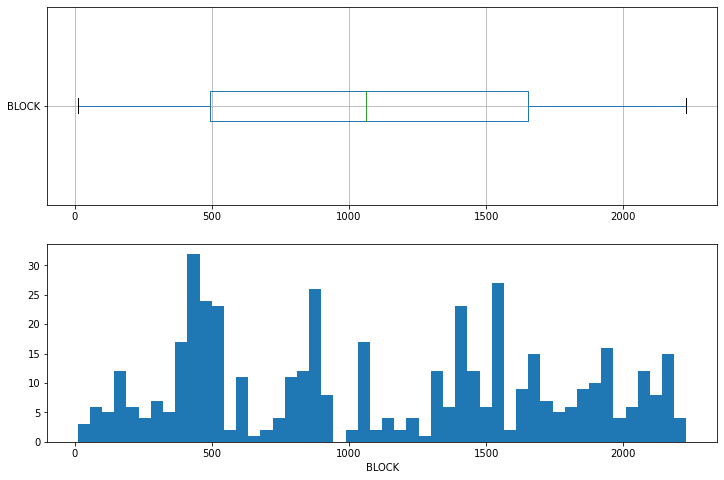

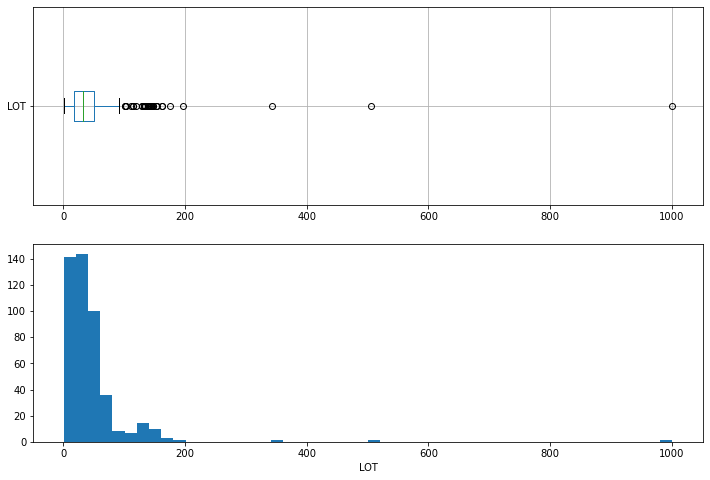

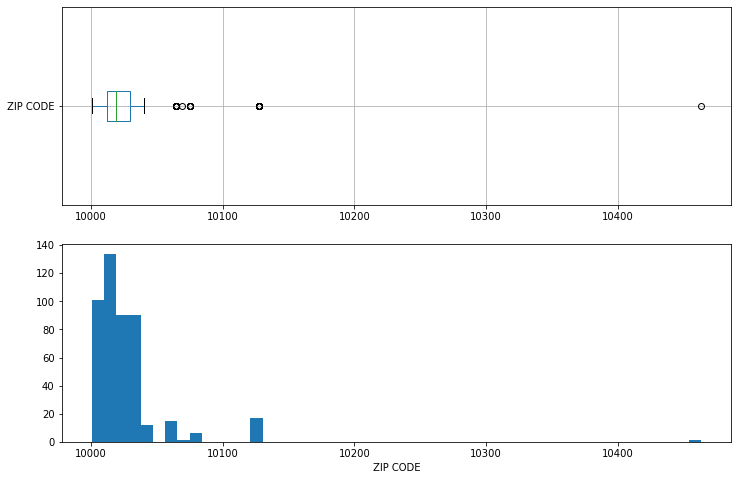

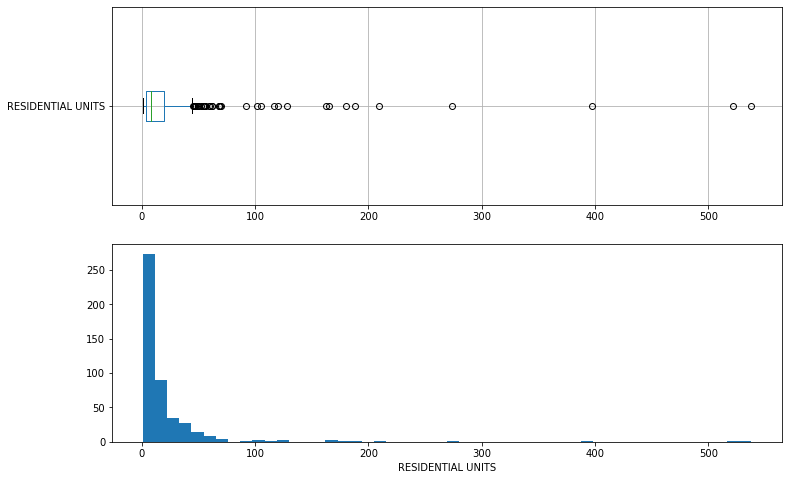

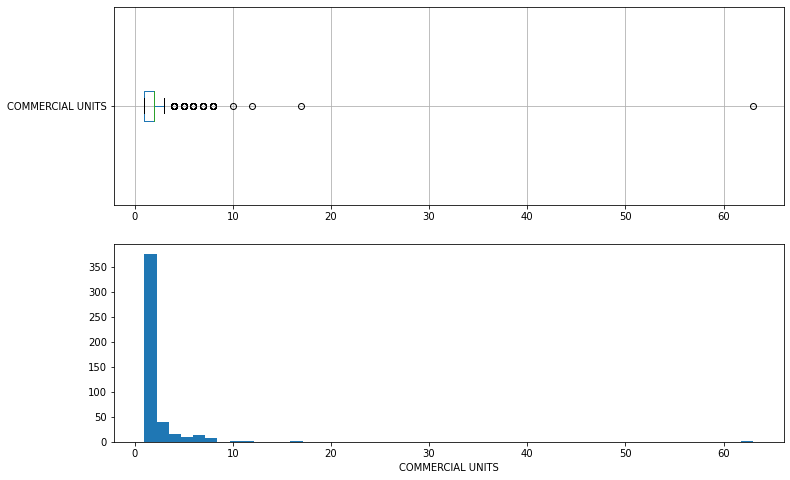

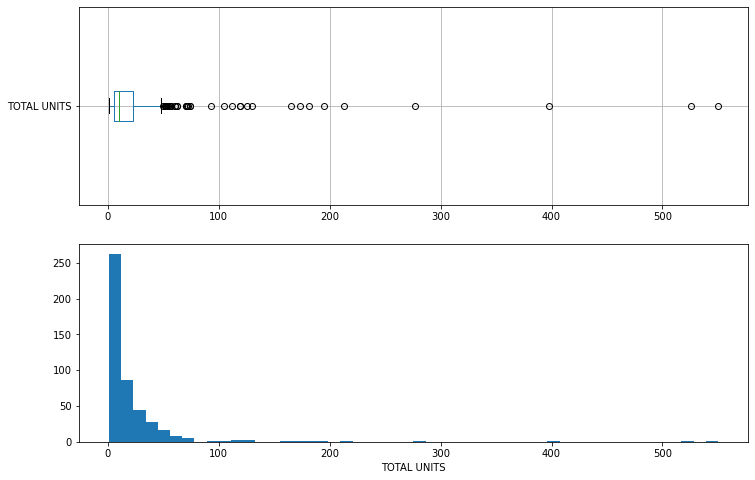

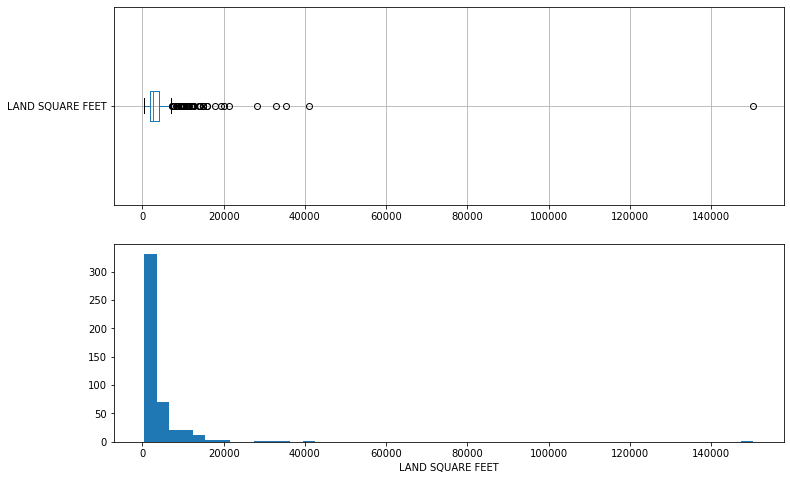

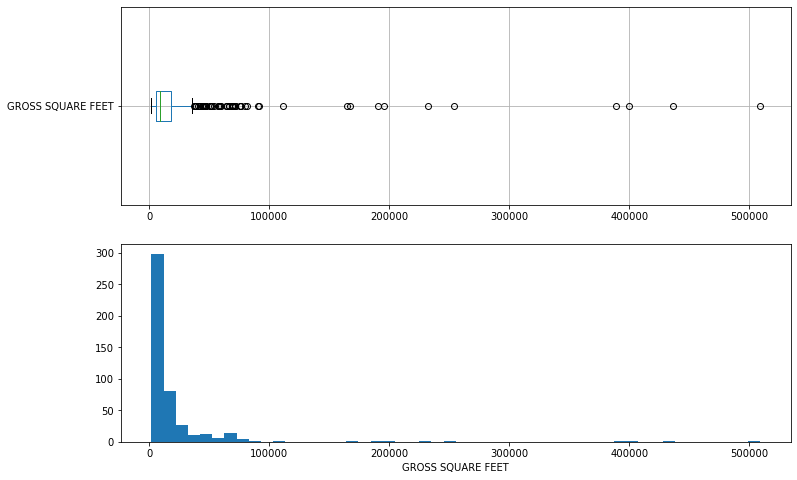

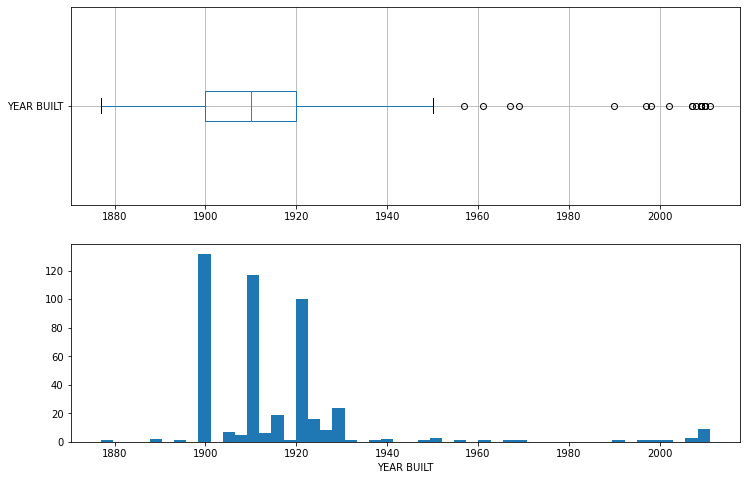

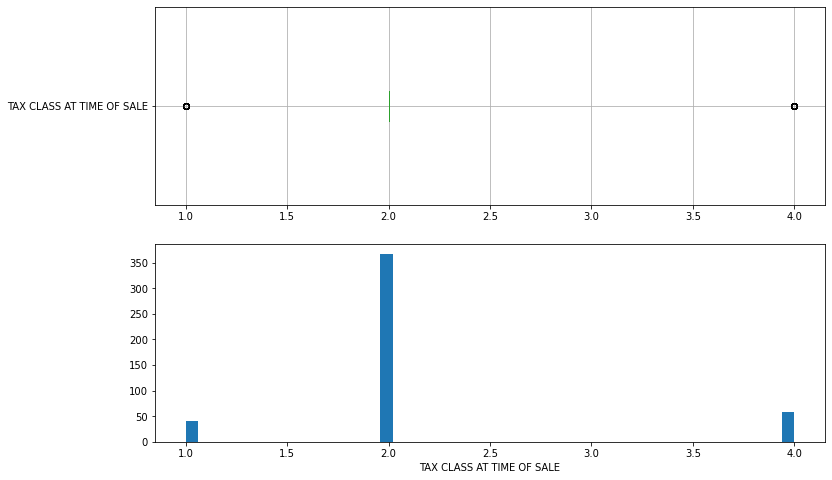

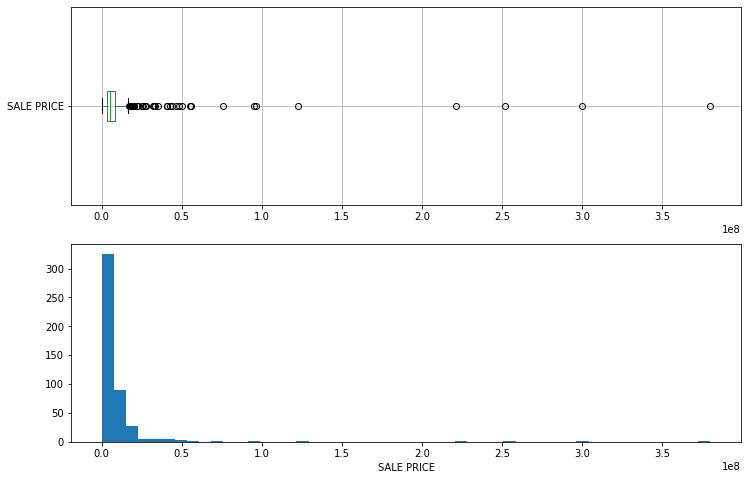

In [331]:
# calling the plotstats function
for col in numeric:
    plotstats(df_small,col)

In [332]:
# defining outliers function
def outliers(df,ft):
    # calculating the lower bound
    q25 = df[ft].quantile(0.25)
    # calculating the upper bound
    q75 = df[ft].quantile(0.75)
    # getting the inter quartile range
    intr_quartile = q75-q25
    
    # getting the maximum value using the 1.5 * IQR
    max= q75+(1.5*intr_quartile)
    # getting the minimum value using the 1.5 * IQR
    min= q25-(1.5*intr_quartile)
    
    # getting the index of outlier from a dataframe
    ls= df.index[(df[ft]<min) | (df[ft]>max)]
    # return the index
    return ls

In [333]:
# initialise an empty index_list
index_list = []
for col in numeric:
    index_list.extend(outliers(df_small, col))

In [334]:
# defining remove function 
def remove(df,ls):
    ls= sorted(set(ls))
    # drop the index_list in a data frame
    df = df.drop(ls)
    return df

In [335]:
# call the remove function and store the new dataframe in a df_cleaned
df_cleaned = remove(df_small, index_list)

In [336]:
# showing the shape of a dataset after cleaning the outliers
df_cleaned.shape

(228, 18)

In [337]:
# showing the shape of a df_small dataset
df_small.shape

(467, 18)

In [338]:
# showing the shape of an original dataset
df.shape

(27395, 18)

In [339]:
# showing the datatypes of columns in a df_cleaned dataframe
df_cleaned.dtypes

NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
ZIP CODE                                 float64
RESIDENTIAL UNITS                        float64
COMMERCIAL UNITS                         float64
TOTAL UNITS                              float64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                               float64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE DATE                         datetime64[ns]
SALE PRICE                               float64
dtype: object

In [340]:
# showing the summary statistics of the df_cleaned dataframe
df_cleaned.describe()

BLOCK         LOT      ZIP CODE  RESIDENTIAL UNITS  \
count   228.000000  228.000000    228.000000         228.000000   
mean   1027.228070   32.574561  10017.745614          11.666667   
std     628.743689   19.628907     10.678160           8.364669   
min      11.000000    1.000000  10001.000000           2.000000   
25%     448.500000   17.750000  10009.000000           6.000000   
50%     888.000000   30.000000  10016.000000           9.000000   
75%    1666.000000   45.000000  10028.000000          16.000000   
max    2230.000000   88.000000  10038.000000          39.000000   

       COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  \
count        228.000000   228.000000        228.000000         228.000000   
mean           1.557018    13.201754       2581.557018        9958.622807   
std            0.657919     8.675430       1107.741263        5462.473998   
min            1.000000     4.000000        469.000000        1875.000000   
25%            1.000000     7.000000       1875.000000        6301.000000   
50%            1.000000    10.000000       2400.000000        8670.500000   
75%            2.000000    18.000000       2755.750000       11886.250000   
max            3.000000    42.000000       7064.000000       28695.000000   

        YEAR BUILT  TAX CLASS AT TIME OF SALE    SALE PRICE  
count   228.000000                      228.0  2.280000e+02  
mean   1911.035088                        2.0  5.094606e+06  
std       9.920770                        0.0  3.256938e+06  
min    1877.000000                        2.0  1.000000e+01  
25%    1900.000000                        2.0  2.996250e+06  
50%    1910.000000                        2.0  4.700000e+06  
75%    1920.000000                        2.0  6.762500e+06  
max    1940.000000                        2.0  1.665000e+07

In [341]:
# showing the missing values of the df_cleaned dataframe
df_cleaned.isnull().sum()

NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE DATE                         0
SALE PRICE                        0
dtype: int64

In [342]:
# apply the log to the 'SALE PRICE' column in a cleaned dataset
df_cleaned['log-SALE PRICE'] = np.log(df_cleaned['SALE PRICE'])

In [343]:
# defining the normalize function
def normalize(df):
 #select numerical columns
    num_cols = df_cleaned.select_dtypes(include=[np.number]).copy()
    num_cols.drop('SALE PRICE', axis='columns', inplace=True)
    df_norm=((num_cols-num_cols.min())/(num_cols.max()-num_cols.min()))
    return df_norm

In [344]:
# Calling the normalize function
data_norm = normalize(df_cleaned)
data_norm.drop(columns={'TAX CLASS AT TIME OF SALE'},inplace=True)

In [345]:
# taking the values from normalized dataset to cleaned dataset
for col in data_norm:
    df_cleaned[col] = data_norm[col]

In [346]:
# print the data in df_cleaned dataframe
print(df_cleaned)

                   NEIGHBORHOOD            BUILDING CLASS CATEGORY  \
26                ALPHABET CITY    07  RENTALS - WALKUP APARTMENTS   
30                ALPHABET CITY    07  RENTALS - WALKUP APARTMENTS   
31                ALPHABET CITY    07  RENTALS - WALKUP APARTMENTS   
32                ALPHABET CITY    07  RENTALS - WALKUP APARTMENTS   
33                ALPHABET CITY    07  RENTALS - WALKUP APARTMENTS   
...                         ...                                ...   
26340  UPPER WEST SIDE (96-116)  08  RENTALS - ELEVATOR APARTMENTS   
26832  WASHINGTON HEIGHTS LOWER    07  RENTALS - WALKUP APARTMENTS   
26854  WASHINGTON HEIGHTS LOWER    07  RENTALS - WALKUP APARTMENTS   
26857  WASHINGTON HEIGHTS LOWER    07  RENTALS - WALKUP APARTMENTS   
27020  WASHINGTON HEIGHTS UPPER    07  RENTALS - WALKUP APARTMENTS   

      TAX CLASS AT PRESENT     BLOCK       LOT BUILDING CLASS AT PRESENT  \
26                       2  0.173952  0.367816                        C7   
30     

In [347]:
# dropping the column 'SALE PRICE' from the dataframe
df_cleaned.drop({'SALE PRICE'}, axis='columns',inplace=True)

In [348]:
# showing the 5 rows from df_cleaned dataframe
df_cleaned.head()

NEIGHBORHOOD          BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
26  ALPHABET CITY  07  RENTALS - WALKUP APARTMENTS                    2   
30  ALPHABET CITY  07  RENTALS - WALKUP APARTMENTS                    2   
31  ALPHABET CITY  07  RENTALS - WALKUP APARTMENTS                   2B   
32  ALPHABET CITY  07  RENTALS - WALKUP APARTMENTS                   2B   
33  ALPHABET CITY  07  RENTALS - WALKUP APARTMENTS                   2B   

       BLOCK       LOT BUILDING CLASS AT PRESENT              ADDRESS  \
26  0.173952  0.367816                        C7          14 AVENUE B   
30  0.174403  0.597701                        C7  170 EAST 2ND STREET   
31  0.175304  0.632184                        C4  203 EAST 4TH STREET   
32  0.175304  0.643678                        C4  201 EAST 4TH STREET   
33  0.175304  0.655172                        C4  199 EAST 4TH STREET   

    ZIP CODE  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  \
26  0.216216           0.621622               0.5     0.605263   
30  0.216216           0.918919               1.0     0.921053   
31  0.216216           0.216216               0.0     0.157895   
32  0.216216           0.189189               0.0     0.131579   
33  0.216216           0.189189               0.0     0.157895   

    LAND SQUARE FEET  GROSS SQUARE FEET  YEAR BUILT  \
26          0.470811           0.609135    0.761905   
30          0.603942           0.588702    0.365079   
31          0.293404           0.190157    0.365079   
32          0.293404           0.186428    0.365079   
33          0.293404           0.195190    0.365079   

    TAX CLASS AT TIME OF SALE BUILDING CLASS AT TIME OF SALE  SALE DATE  \
26                          2                             C7 2013-01-31   
30                          2                             C7 2012-10-26   
31                          2                             C4 2013-04-09   
32                          2                             C4 2013-04-09   
33                          2                             C4 2013-04-09   

    log-SALE PRICE  
26        0.983716  
30        0.897062  
31        0.942760  
32        0.942760  
33        0.942760

## 1.2 Data Exploration 

## Visualise the prices across neighborhood

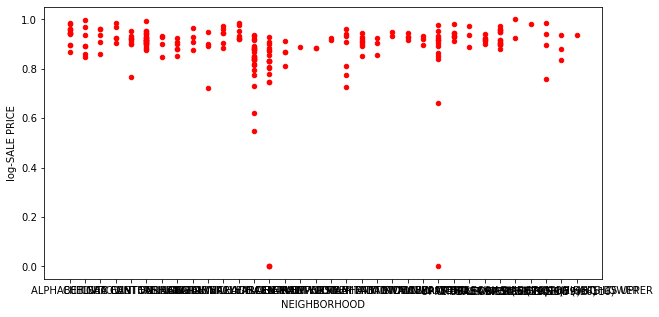

In [349]:
# plot the figure prices vs neighborhood  
fig,((ax1))=plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(10)
df_cleaned.plot.scatter(x='NEIGHBORHOOD',y='log-SALE PRICE',ax=ax1, c="red")
plt.show()

## Visualise the prices over time

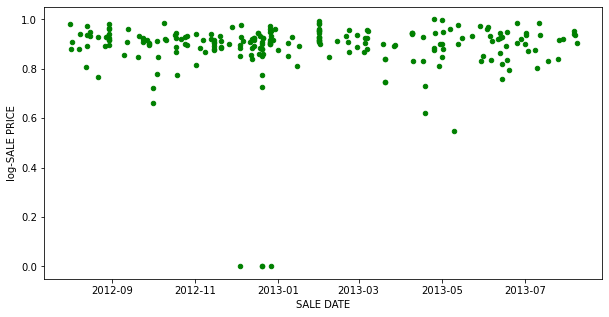

In [350]:
# plot the figure prices vs sale date  
fig,((ax1))=plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(10)
df_cleaned.plot.scatter(x='SALE DATE',y='log-SALE PRICE',ax=ax1, c="Green")
plt.show()

## Scatter Matrix plot

C:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:89: UserWarning: Attempting to set identical left == right == 2.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:90: UserWarning: Attempting to set identical bottom == top == 2.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 2.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<AxesSubplot:xlabel='BLOCK', ylabel='BLOCK'>,
        <AxesSubplot:xlabel='LOT', ylabel='BLOCK'>,
        <AxesSubplot:xlabel='ZIP CODE', ylabel='BLOCK'>,
        <AxesSubplot:xlabel='RESIDENTIAL UNITS', ylabel='BLOCK'>,
        <AxesSubplot:xlabel='COMMERCIAL UNITS', ylabel='BLOCK'>,
        <AxesSubplot:xlabel='TOTAL UNITS', ylabel='BLOCK'>,
        <AxesSubplot:xlabel='LAND SQUARE FEET', ylabel='BLOCK'>,
        <AxesSubplot:xlabel='GROSS SQUARE FEET', ylabel='BLOCK'>,
        <AxesSubplot:xlabel='YEAR BUILT', ylabel='BLOCK'>,
        <AxesSubplot:xlabel='TAX CLASS AT TIME OF SALE', ylabel='BLOCK'>,
        <AxesSubplot:xlabel='log-SALE PRICE', ylabel='BLOCK'>],
       [<AxesSubplot:xlabel='BLOCK', ylabel='LOT'>,
        <AxesSubplot:xlabel='LOT', ylabel='LOT'>,
        <AxesSubplot:xlabel='ZIP CODE', ylabel='LOT'>,
        <AxesSubplot:xlabel='RESIDENTIAL UNITS', ylabel='LOT'>,
        <AxesSubplot:xlabel='COMMERCIAL UNITS', ylabel='LOT'>,
        <AxesSubplot:xlabel='TOTAL

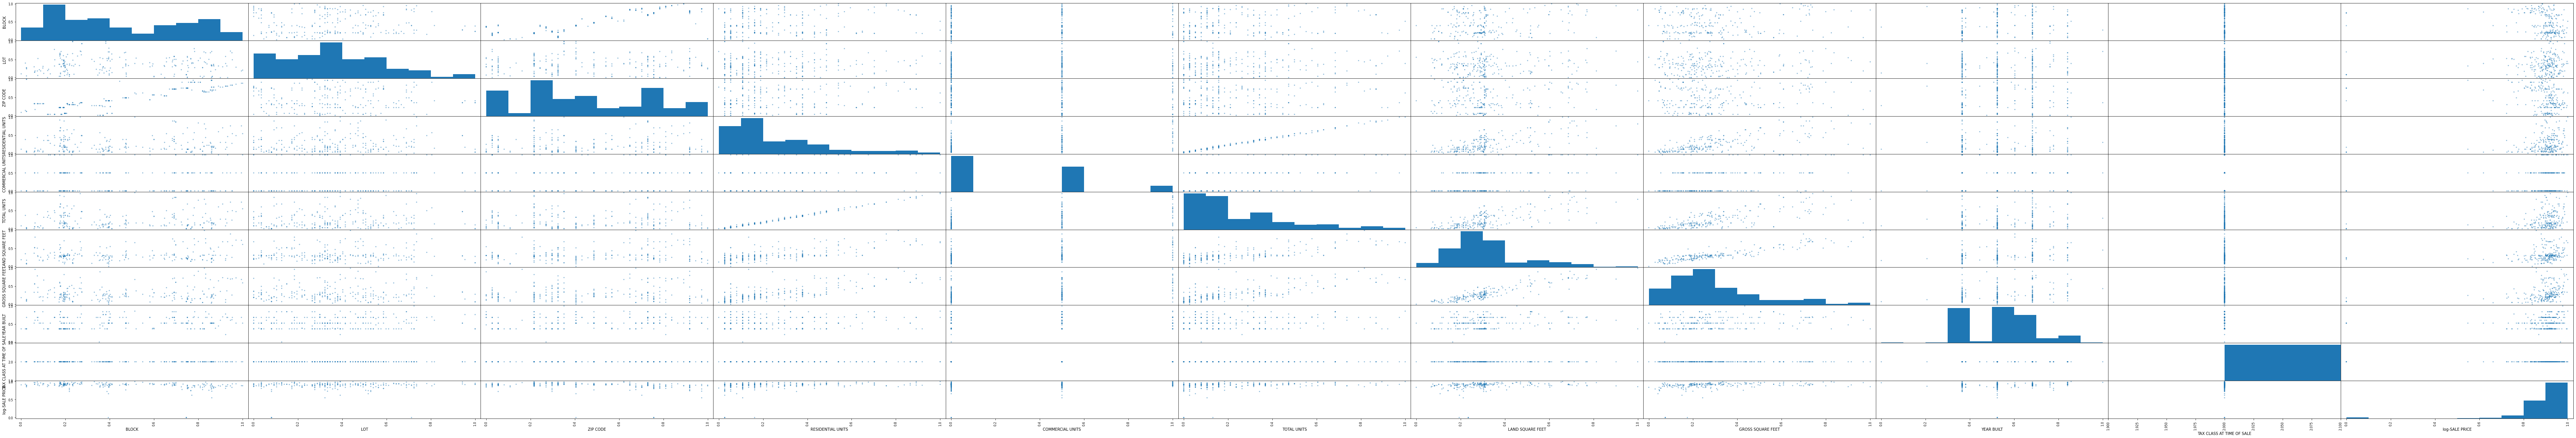

In [351]:
# Creating the scatter matrix:
pd.plotting.scatter_matrix(df_cleaned, figsize=(120,20))

array([[<AxesSubplot:xlabel='BLOCK', ylabel='BLOCK'>,
        <AxesSubplot:xlabel='LOT', ylabel='BLOCK'>,
        <AxesSubplot:xlabel='ZIP CODE', ylabel='BLOCK'>,
        <AxesSubplot:xlabel='RESIDENTIAL UNITS', ylabel='BLOCK'>,
        <AxesSubplot:xlabel='COMMERCIAL UNITS', ylabel='BLOCK'>,
        <AxesSubplot:xlabel='TOTAL UNITS', ylabel='BLOCK'>,
        <AxesSubplot:xlabel='LAND SQUARE FEET', ylabel='BLOCK'>,
        <AxesSubplot:xlabel='GROSS SQUARE FEET', ylabel='BLOCK'>,
        <AxesSubplot:xlabel='YEAR BUILT', ylabel='BLOCK'>,
        <AxesSubplot:xlabel='TAX CLASS AT TIME OF SALE', ylabel='BLOCK'>,
        <AxesSubplot:xlabel='log-SALE PRICE', ylabel='BLOCK'>],
       [<AxesSubplot:xlabel='BLOCK', ylabel='LOT'>,
        <AxesSubplot:xlabel='LOT', ylabel='LOT'>,
        <AxesSubplot:xlabel='ZIP CODE', ylabel='LOT'>,
        <AxesSubplot:xlabel='RESIDENTIAL UNITS', ylabel='LOT'>,
        <AxesSubplot:xlabel='COMMERCIAL UNITS', ylabel='LOT'>,
        <AxesSubplot:xlabel='TOTAL

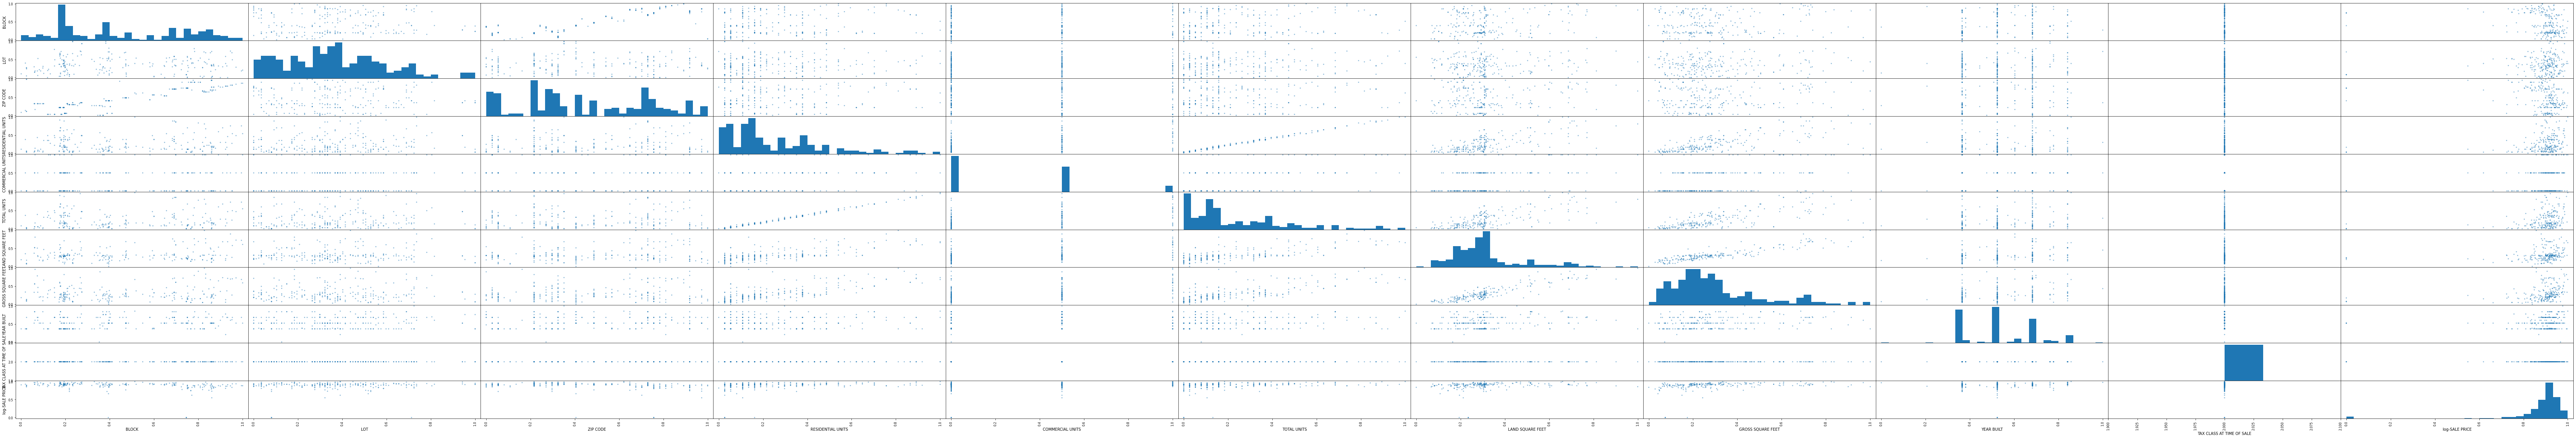

In [352]:
# Changing the number of bins of the scatter matrix in Python
pd.plotting.scatter_matrix(df_cleaned, figsize=(120,20), hist_kwds={'bins':30})

array([[<AxesSubplot:xlabel='BLOCK', ylabel='BLOCK'>,
        <AxesSubplot:xlabel='LOT', ylabel='BLOCK'>,
        <AxesSubplot:xlabel='ZIP CODE', ylabel='BLOCK'>,
        <AxesSubplot:xlabel='RESIDENTIAL UNITS', ylabel='BLOCK'>,
        <AxesSubplot:xlabel='COMMERCIAL UNITS', ylabel='BLOCK'>,
        <AxesSubplot:xlabel='TOTAL UNITS', ylabel='BLOCK'>,
        <AxesSubplot:xlabel='LAND SQUARE FEET', ylabel='BLOCK'>,
        <AxesSubplot:xlabel='GROSS SQUARE FEET', ylabel='BLOCK'>,
        <AxesSubplot:xlabel='YEAR BUILT', ylabel='BLOCK'>,
        <AxesSubplot:xlabel='TAX CLASS AT TIME OF SALE', ylabel='BLOCK'>,
        <AxesSubplot:xlabel='log-SALE PRICE', ylabel='BLOCK'>],
       [<AxesSubplot:xlabel='BLOCK', ylabel='LOT'>,
        <AxesSubplot:xlabel='LOT', ylabel='LOT'>,
        <AxesSubplot:xlabel='ZIP CODE', ylabel='LOT'>,
        <AxesSubplot:xlabel='RESIDENTIAL UNITS', ylabel='LOT'>,
        <AxesSubplot:xlabel='COMMERCIAL UNITS', ylabel='LOT'>,
        <AxesSubplot:xlabel='TOTAL

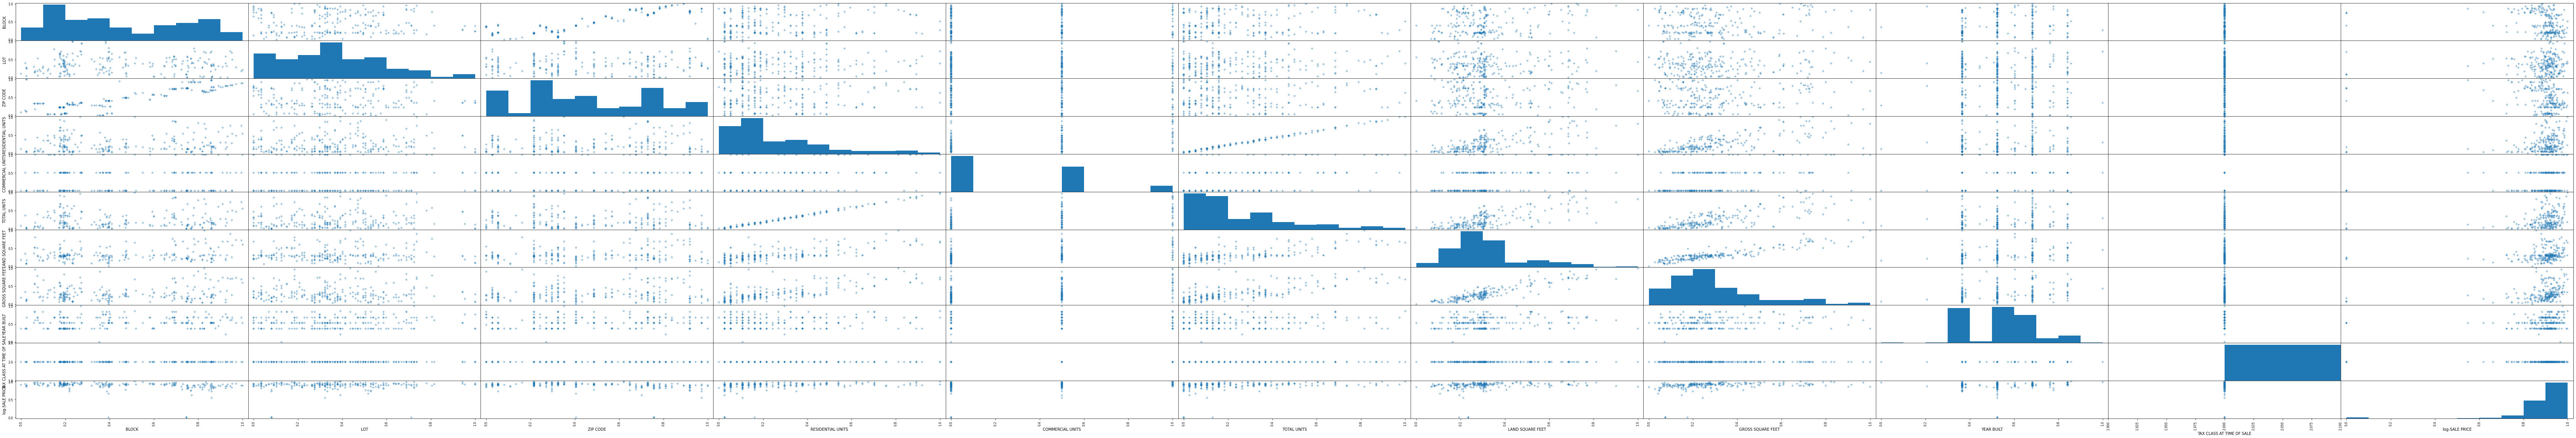

In [353]:
# Pandas scatter_matrix with "+" as markers
pd.plotting.scatter_matrix(df_cleaned, figsize=(120,20), marker='+')

## Correlation Matrix

In [354]:
# showing the shape of an original dataset
df.shape

(27395, 18)

In [355]:
# correlation matrix for original dataset
df.corr()

BLOCK       LOT  ZIP CODE  RESIDENTIAL UNITS  \
BLOCK                      1.000000 -0.190051  0.174566           0.075659   
LOT                       -0.190051  1.000000  0.259337          -0.165685   
ZIP CODE                   0.174566  0.259337  1.000000          -0.011285   
RESIDENTIAL UNITS          0.075659 -0.165685 -0.011285           1.000000   
COMMERCIAL UNITS          -0.021113 -0.057746 -0.027379           0.335878   
TOTAL UNITS                0.068880 -0.150203 -0.002676           0.999283   
LAND SQUARE FEET          -0.035151  0.062439 -0.044802           0.859076   
GROSS SQUARE FEET         -0.170336 -0.028596 -0.113088           0.950292   
YEAR BUILT                -0.077556  0.304992  0.084003          -0.079680   
TAX CLASS AT TIME OF SALE -0.115519  0.095990 -0.124982           0.028643   
SALE PRICE                -0.020252 -0.027090 -0.010574           0.687956   

                           COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
BLOCK                             -0.021113     0.068880         -0.035151   
LOT                               -0.057746    -0.150203          0.062439   
ZIP CODE                          -0.027379    -0.002676         -0.044802   
RESIDENTIAL UNITS                  0.335878     0.999283          0.859076   
COMMERCIAL UNITS                   1.000000     0.379958          0.180021   
TOTAL UNITS                        0.379958     1.000000          0.493077   
LAND SQUARE FEET                   0.180021     0.493077          1.000000   
GROSS SQUARE FEET                  0.302926     0.426153          0.739576   
YEAR BUILT                        -0.058579    -0.091489          0.246777   
TAX CLASS AT TIME OF SALE          0.046876    -0.055140          0.250873   
SALE PRICE                         0.199065     0.261624          0.382177   

                           GROSS SQUARE FEET  YEAR BUILT  \
BLOCK                              -0.170336   -0.077556   
LOT                                -0.028596    0.304992   
ZIP CODE                           -0.113088    0.084003   
RESIDENTIAL UNITS                   0.950292   -0.079680   
COMMERCIAL UNITS                    0.302926   -0.058579   
TOTAL UNITS                         0.426153   -0.091489   
LAND SQUARE FEET                    0.739576    0.246777   
GROSS SQUARE FEET                   1.000000    0.562680   
YEAR BUILT                          0.562680    1.000000   
TAX CLASS AT TIME OF SALE           0.489327    0.293717   
SALE PRICE                          0.469032   -0.028839   

                           TAX CLASS AT TIME OF SALE  SALE PRICE  
BLOCK                                      -0.115519   -0.020252  
LOT                                         0.095990   -0.027090  
ZIP CODE                                   -0.124982   -0.010574  
RESIDENTIAL UNITS                           0.028643    0.687956  
COMMERCIAL UNITS                            0.046876    0.199065  
TOTAL UNITS                                -0.055140    0.261624  
LAND SQUARE FEET                            0.250873    0.382177  
GROSS SQUARE FEET                           0.489327    0.469032  
YEAR BUILT                                  0.293717   -0.028839  
TAX CLASS AT TIME OF SALE                   1.000000    0.073640  
SALE PRICE                                  0.073640    1.000000

In [356]:
# correlation matrix for cleaned dataset
df_cleaned.corr()

BLOCK       LOT  ZIP CODE  RESIDENTIAL UNITS  \
BLOCK                      1.000000  0.000781  0.838238           0.102779   
LOT                        0.000781  1.000000  0.010642           0.073453   
ZIP CODE                   0.838238  0.010642  1.000000           0.066172   
RESIDENTIAL UNITS          0.102779  0.073453  0.066172           1.000000   
COMMERCIAL UNITS           0.043471  0.052543 -0.028025           0.445336   
TOTAL UNITS                0.104924  0.071751  0.063756           0.997426   
LAND SQUARE FEET           0.203291  0.012582  0.150636           0.709763   
GROSS SQUARE FEET          0.122312  0.022942  0.107390           0.734395   
YEAR BUILT                 0.159718  0.110993  0.176071           0.148782   
TAX CLASS AT TIME OF SALE       NaN       NaN       NaN                NaN   
log-SALE PRICE            -0.246150  0.073903 -0.236991           0.242505   

                           COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
BLOCK                              0.043471     0.104924          0.203291   
LOT                                0.052543     0.071751          0.012582   
ZIP CODE                          -0.028025     0.063756          0.150636   
RESIDENTIAL UNITS                  0.445336     0.997426          0.709763   
COMMERCIAL UNITS                   1.000000     0.505827          0.464337   
TOTAL UNITS                        0.505827     1.000000          0.719976   
LAND SQUARE FEET                   0.464337     0.719976          1.000000   
GROSS SQUARE FEET                  0.465969     0.744230          0.901252   
YEAR BUILT                         0.160999     0.156132          0.239476   
TAX CLASS AT TIME OF SALE               NaN          NaN               NaN   
log-SALE PRICE                     0.164762     0.245155          0.180911   

                           GROSS SQUARE FEET  YEAR BUILT  \
BLOCK                               0.122312    0.159718   
LOT                                 0.022942    0.110993   
ZIP CODE                            0.107390    0.176071   
RESIDENTIAL UNITS                   0.734395    0.148782   
COMMERCIAL UNITS                    0.465969    0.160999   
TOTAL UNITS                         0.744230    0.156132   
LAND SQUARE FEET                    0.901252    0.239476   
GROSS SQUARE FEET                   1.000000    0.236657   
YEAR BUILT                          0.236657    1.000000   
TAX CLASS AT TIME OF SALE                NaN         NaN   
log-SALE PRICE                      0.258130    0.087840   

                           TAX CLASS AT TIME OF SALE  log-SALE PRICE  
BLOCK                                            NaN       -0.246150  
LOT                                              NaN        0.073903  
ZIP CODE                                         NaN       -0.236991  
RESIDENTIAL UNITS                                NaN        0.242505  
COMMERCIAL UNITS                                 NaN        0.164762  
TOTAL UNITS                                      NaN        0.245155  
LAND SQUARE FEET                                 NaN        0.180911  
GROSS SQUARE FEET                                NaN        0.258130  
YEAR BUILT                                       NaN        0.087840  
TAX CLASS AT TIME OF SALE                        NaN             NaN  
log-SALE PRICE                                   NaN        1.000000

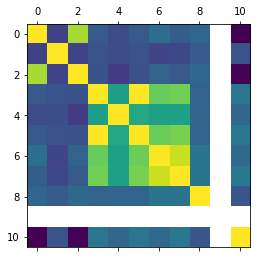

In [357]:
# color format of correlation matrix for cleaned dataset
plt.matshow(df_cleaned.corr())
plt.show()

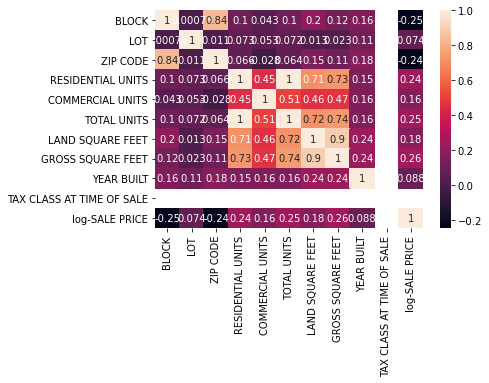

In [358]:
# heatmap of correlation matrix for cleaned dataset
sns.heatmap(df_cleaned.corr(),annot=True)
plt.show()

### Further plots of cleaned dataset

<Figure size 432x288 with 0 Axes>

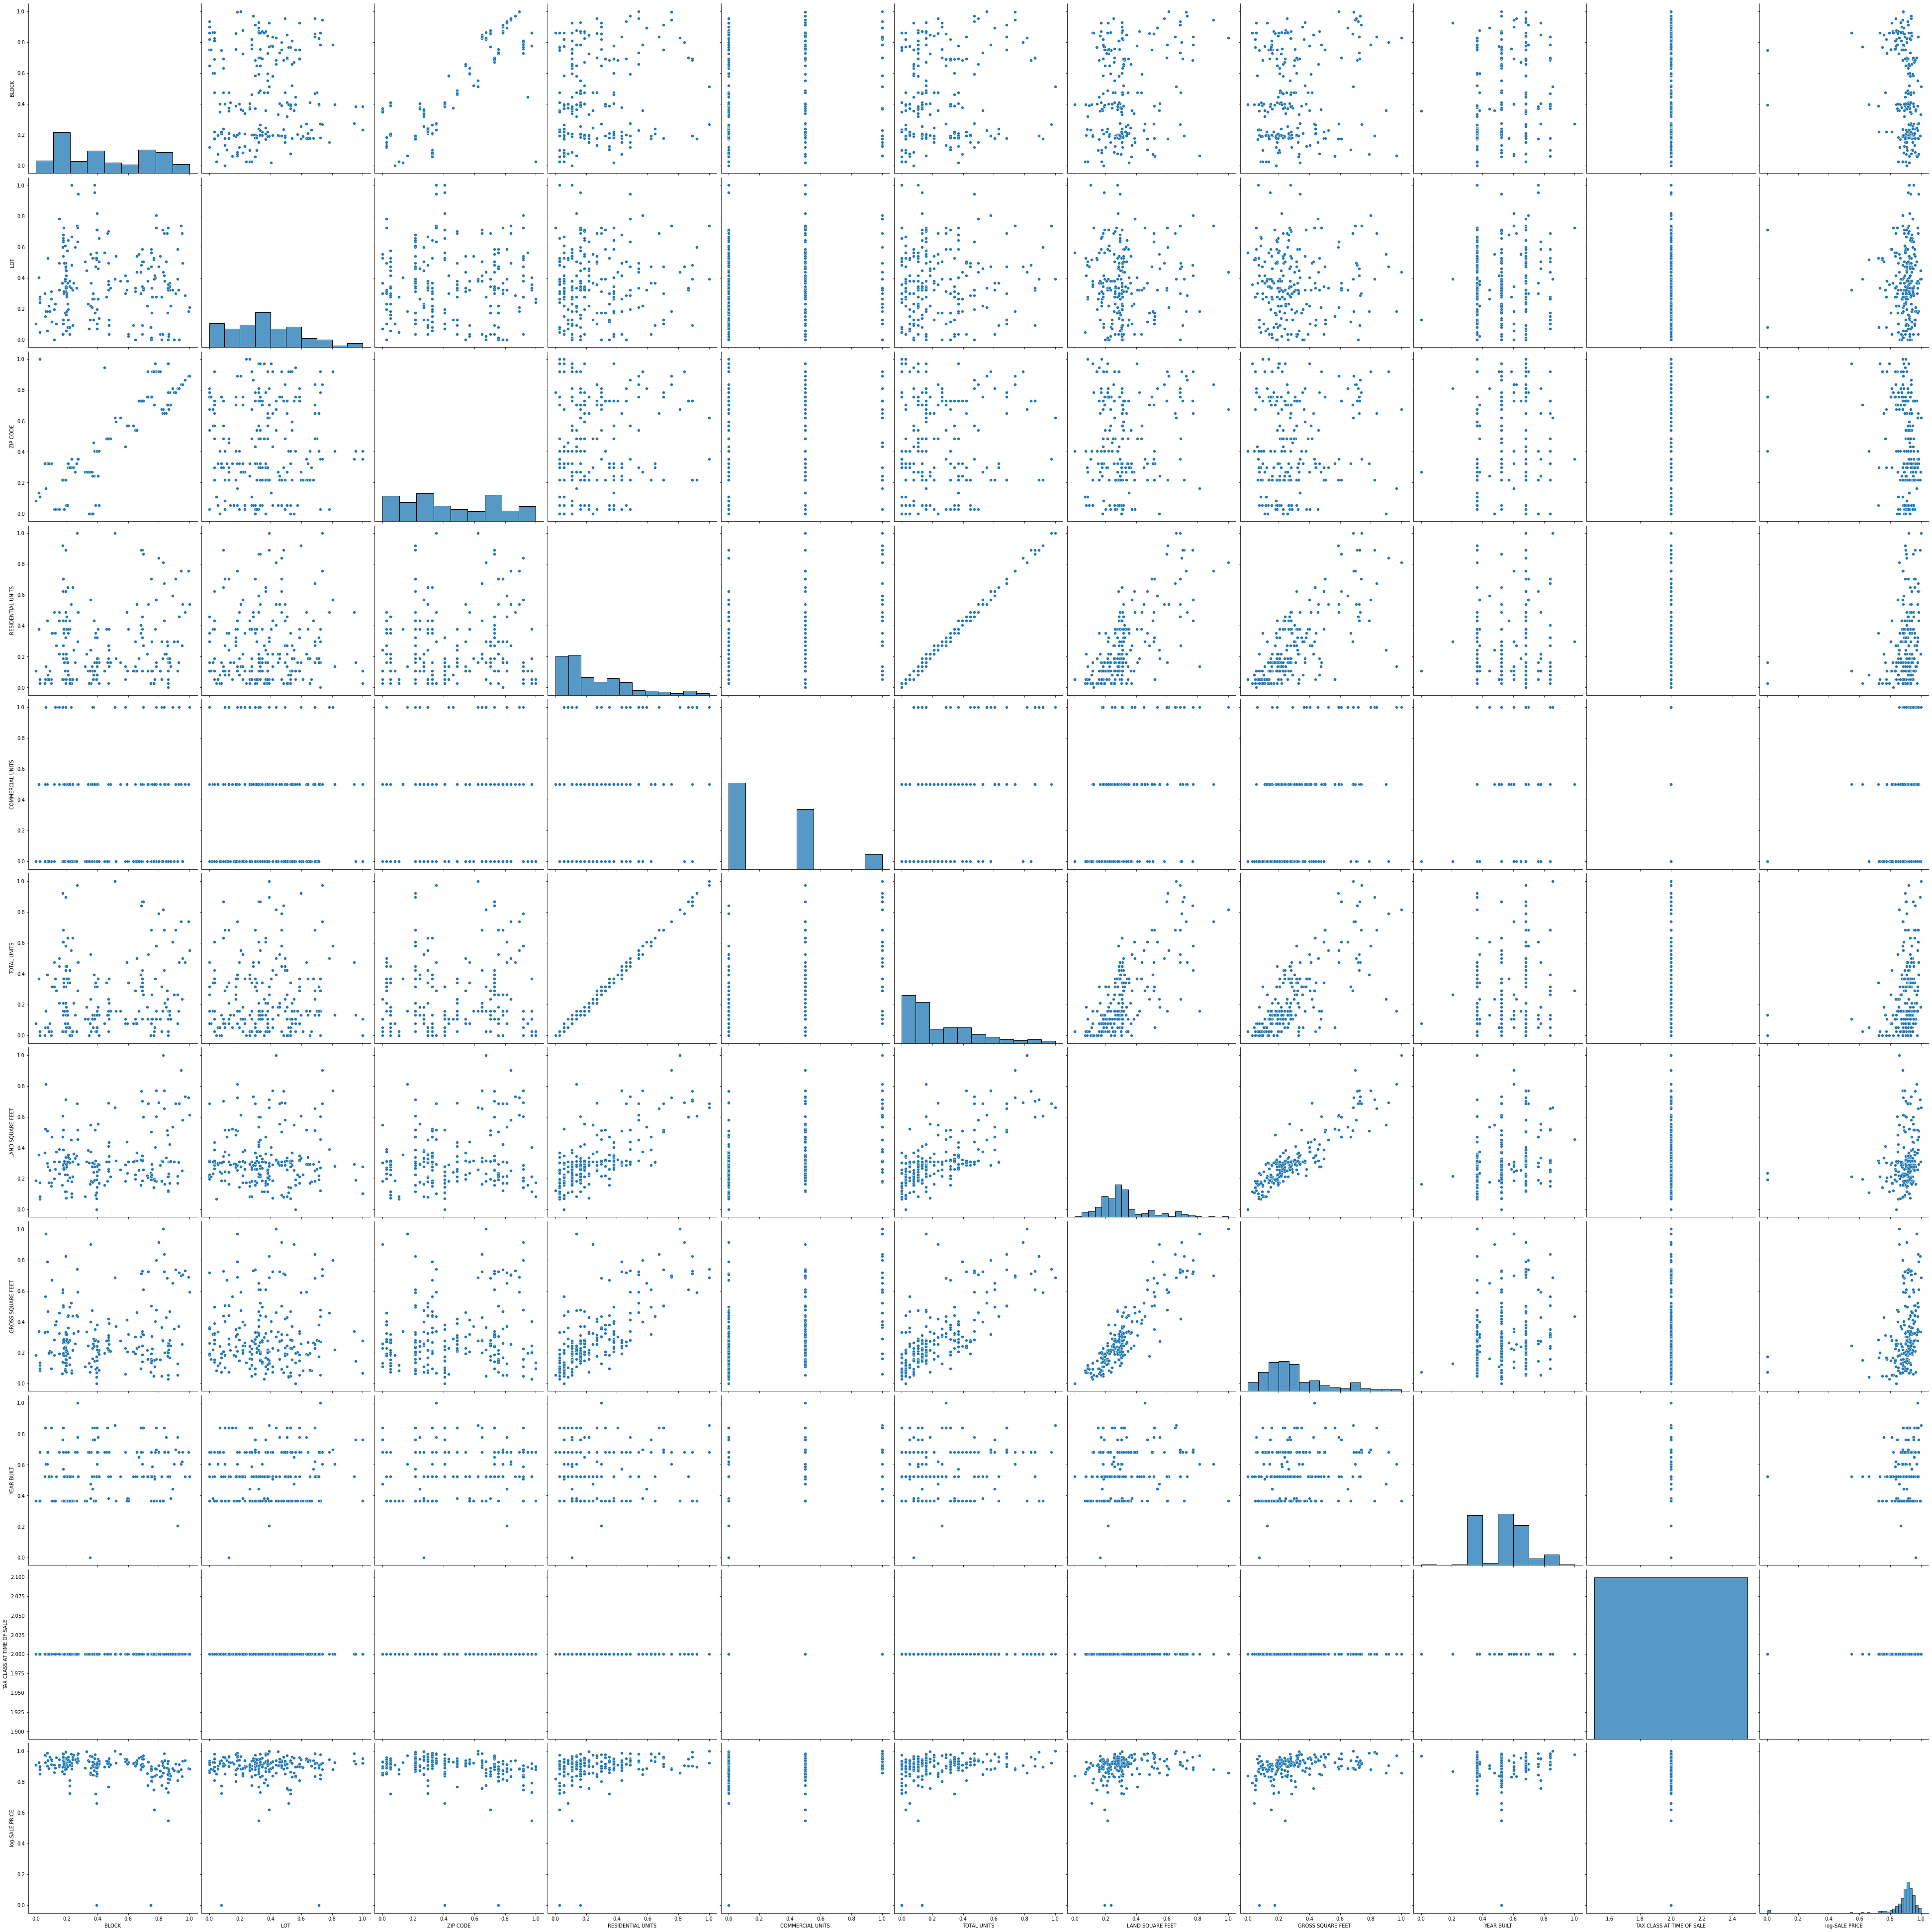

In [359]:
# pairplot of cleaned dataset
plt.figure()
sns.pairplot(df_cleaned,height=5)
plt.savefig('sp.png')
plt.show()

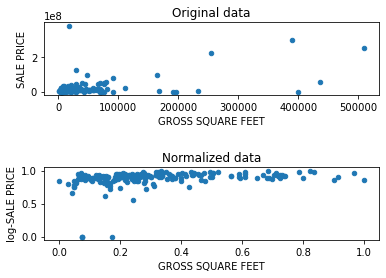

In [360]:
# plot the figures of original and normalised for 'GROSS SQUARE FEET'
f, ax = plt.subplots(2)
df_small.plot.scatter(x="GROSS SQUARE FEET",y="SALE PRICE",ax=ax[0],\
 title="Original data")
df_cleaned.plot.scatter(x="GROSS SQUARE FEET", y="log-SALE PRICE", ax=ax[1],\
 title="Normalized data")
f.subplots_adjust(hspace=1)
plt.show()

# 1.3 Model Building

In [361]:
# Splitting the dataset into trainset and testset
df_train, df_test = train_test_split(data_norm, test_size=0.3)
print("Training size: {}, Testing size: {}".format(len(df_train),
len(df_test)))
print("Samples: {} Features: {}".format(*df_train.shape))

Training size: 159, Testing size: 69
Samples: 159 Features: 10


In [362]:
# selecting the numeical columns from the dataframe
df1 = data_norm.select_dtypes(include=[np.number]).copy()
# converting column values to list
feature_cols = df1.columns.values.tolist()
# removing the target variable
feature_cols.remove('log-SALE PRICE')
# assigning the feature_cols to XO variable
XO = df1[feature_cols]
# assigning the target variable to YO variable
YO = df1['log-SALE PRICE']
# Defining the kernel 
estimator = svm.SVR(kernel="linear")
# Feature selection based on RFE
selector = feature_selection.RFE(estimator, 9, step=1)
selector = selector.fit(XO, YO)
# From the ranking you can select your predictors with rank 1
# Model 1; let us select the folowing features as predictors:
select_features = np.array(feature_cols)[selector.ranking_ == 1].tolist()
print(select_features)
X = df1[select_features]
Y = df1['log-SALE PRICE']
# Splitting the dataset into trainset and testset
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2)
# LinearRegression()
lm = linear_model.LinearRegression()
# Using fit()
lm.fit(trainX, trainY)
# Inspect the calculated model equations
print("Y-axis intercept {:6.4f}".format(lm.intercept_))
print("Weight coefficients:")
for feat, coef in zip(select_features, lm.coef_):
    print(" {:>20}: {:6.4f}".format(feat, coef))
# The value of R^2
print("R squared for the training data is {:4.3f}".format(lm.score(trainX,
trainY)))
print("Score against test data: {:4.3f}".format(lm.score(testX, testY)))

['BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT']
Y-axis intercept 0.8577
Weight coefficients:
                BLOCK: -0.0992
                  LOT: 0.0637
             ZIP CODE: -0.0555
    RESIDENTIAL UNITS: 0.1978
     COMMERCIAL UNITS: 0.0133
          TOTAL UNITS: -0.1126
     LAND SQUARE FEET: -0.2023
    GROSS SQUARE FEET: 0.2464
           YEAR BUILT: 0.0665
R squared for the training data is 0.225
Score against test data: -0.052


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=9 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [363]:
# evaluate the mean squared error
def mse(df, pred, obs):
    n = df.shape[0]
    return sum((df[pred]-df[obs])**2)/n
df1['pred'] = lm.predict(X)
print("Mean Squared error: {}".format(mse(df1,'pred', 'log-SALE PRICE')))

Mean Squared error: 0.014844166385844647


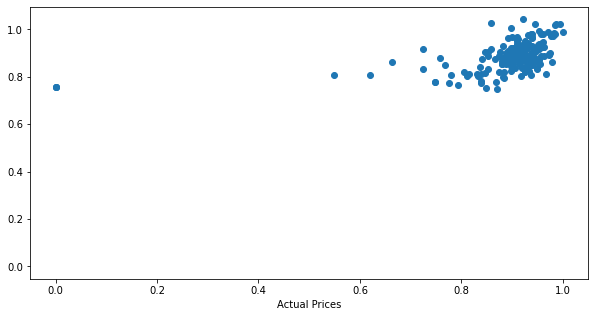

In [364]:
# predicting the target_variable for trainY
pred_trainY = lm.predict(trainX)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
plt.plot(trainY, pred_trainY, 'o')
plt.plot(range(int(data_norm['log-SALE PRICE'].max())),range(int(data_norm['log-SALE PRICE'].max())), color='green')
plb.xlabel('Actual Prices')
plt.ylabel='Predicted Prices'
plt.title='Plot of predicted vs actual prices'
plt.show()

In [365]:
# Validating the model using K-Fold cross_validation
crossvalidation = KFold(10, shuffle=True, random_state=0)
score1=cross_val_score(lm, X, Y,scoring='neg_mean_squared_error',cv=crossvalidation,n_jobs=-1)
print("X valiation score for Linear regression is: {:5.4f}".format(np.mean(np.abs(score1)))+ ", STD: " + str(np.std(score1)))

X valiation score for Linear regression is: 0.0155, STD: 0.02022447864735648


# 2	Part 2 - Improved model

In [366]:
# showing the shape of original dataset
df.shape

(27395, 18)

In [367]:
# showing the 5 rows from the dataframe
df.head()

NEIGHBORHOOD           BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0          NaN  13  CONDOS - ELEVATOR APARTMENTS                  NaN    738   
1          NaN  13  CONDOS - ELEVATOR APARTMENTS                  NaN    738   
2          NaN  13  CONDOS - ELEVATOR APARTMENTS                  NaN    738   
3          NaN  13  CONDOS - ELEVATOR APARTMENTS                  NaN    738   
4          NaN  13  CONDOS - ELEVATOR APARTMENTS                  NaN    738   

    LOT BUILDING CLASS AT PRESENT                 ADDRESS  ZIP CODE  \
0  1306                       NaN  345 WEST 14TH   STREET   10014.0   
1  1307                       NaN  345 WEST 14TH   STREET   10014.0   
2  1308                       NaN  345 WEST 14TH   STREET   10014.0   
3  1309                       NaN  345 WEST 14TH   STREET   10014.0   
4  1310                       NaN  345 WEST 14TH   STREET   10014.0   

   RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
0                NaN               NaN          NaN               NaN   
1                NaN               NaN          NaN               NaN   
2                NaN               NaN          NaN               NaN   
3                NaN               NaN          NaN               NaN   
4                NaN               NaN          NaN               NaN   

   GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE  \
0                NaN         NaN                          2   
1                NaN         NaN                          2   
2                NaN         NaN                          2   
3                NaN         NaN                          2   
4                NaN         NaN                          2   

  BUILDING CLASS AT TIME OF SALE  SALE DATE  SALE PRICE  
0                             R4 2013-05-20   2214693.0  
1                             R4 2013-05-16   1654656.0  
2                             R4 2013-05-23   1069162.0  
3                             R4 2013-05-15   1374637.0  
4                             R4 2013-05-13   1649565.0

In [368]:
# showing the datatypes of dataframe
df.dtypes

NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
ZIP CODE                                 float64
RESIDENTIAL UNITS                        float64
COMMERCIAL UNITS                         float64
TOTAL UNITS                              float64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                               float64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE DATE                         datetime64[ns]
SALE PRICE                               float64
dtype: object

In [369]:
# taking all categorical columns into a category list
category = df.select_dtypes("object").columns.tolist()

# taking all numeical columns into a numeric list
numeric = df.select_dtypes("number").columns.tolist()

In [370]:
# showing the missing values from the dataframe before replacing with median and mode
df.isnull().sum()

NEIGHBORHOOD                         17
BUILDING CLASS CATEGORY            3454
TAX CLASS AT PRESENT                143
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           143
ADDRESS                               0
ZIP CODE                              1
RESIDENTIAL UNITS                 16372
COMMERCIAL UNITS                  23962
TOTAL UNITS                        9704
LAND SQUARE FEET                  22906
GROSS SQUARE FEET                 23069
YEAR BUILT                         6441
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE DATE                             0
SALE PRICE                         7593
dtype: int64

In [371]:
# fill the missing values with mean in numerical columns
for col in numeric:
    df[col]=df[col].fillna(df[col].median())

# fill the missing values with mode in categorical columns
for col in category:
    df[col]=df[col].fillna(df[col].mode().iloc[0])

In [372]:
# showing the missing values from the dataframe after replacing with median and mode
df.isnull().sum()

NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE DATE                         0
SALE PRICE                        0
dtype: int64

In [373]:
# showing the 5 rows
df.head()

NEIGHBORHOOD           BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0  MIDTOWN WEST  13  CONDOS - ELEVATOR APARTMENTS                    2    738   
1  MIDTOWN WEST  13  CONDOS - ELEVATOR APARTMENTS                    2    738   
2  MIDTOWN WEST  13  CONDOS - ELEVATOR APARTMENTS                    2    738   
3  MIDTOWN WEST  13  CONDOS - ELEVATOR APARTMENTS                    2    738   
4  MIDTOWN WEST  13  CONDOS - ELEVATOR APARTMENTS                    2    738   

    LOT BUILDING CLASS AT PRESENT                 ADDRESS  ZIP CODE  \
0  1306                        R4  345 WEST 14TH   STREET   10014.0   
1  1307                        R4  345 WEST 14TH   STREET   10014.0   
2  1308                        R4  345 WEST 14TH   STREET   10014.0   
3  1309                        R4  345 WEST 14TH   STREET   10014.0   
4  1310                        R4  345 WEST 14TH   STREET   10014.0   

   RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
0                1.0               2.0          1.0            5046.0   
1                1.0               2.0          1.0            5046.0   
2                1.0               2.0          1.0            5046.0   
3                1.0               2.0          1.0            5046.0   
4                1.0               2.0          1.0            5046.0   

   GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE  \
0            23371.5      1955.0                          2   
1            23371.5      1955.0                          2   
2            23371.5      1955.0                          2   
3            23371.5      1955.0                          2   
4            23371.5      1955.0                          2   

  BUILDING CLASS AT TIME OF SALE  SALE DATE  SALE PRICE  
0                             R4 2013-05-20   2214693.0  
1                             R4 2013-05-16   1654656.0  
2                             R4 2013-05-23   1069162.0  
3                             R4 2013-05-15   1374637.0  
4                             R4 2013-05-13   1649565.0

In [374]:
# defining plotstats function
def plotstats(df, col):
    # plot with various axes scales
    fig = plt.figure(1)
    fig.set_size_inches(12,8)
    ## First a box plot
    plt.subplot(2,1,1)
    df.dropna().boxplot(col, vert=False)
    ## Then Plot the histogram 
    plt.subplot(2,1,2)  
    temp = df[col]
    plt.hist(temp, bins = 50)
    plt.ylabel='Total number of units'
    plt.xlabel(col)
    plt.show()

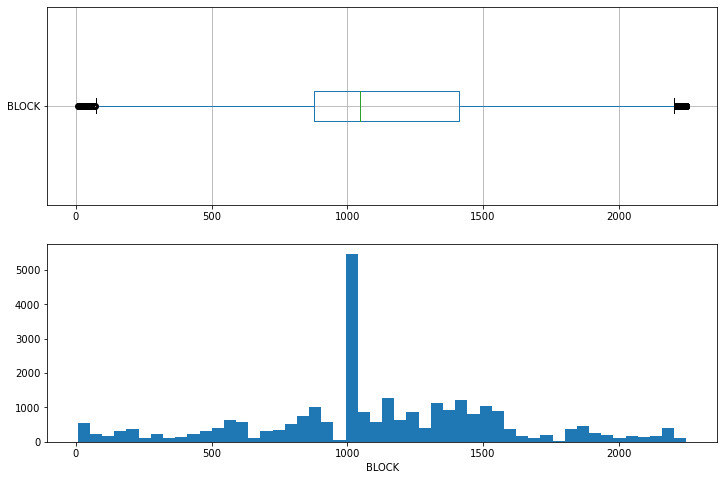

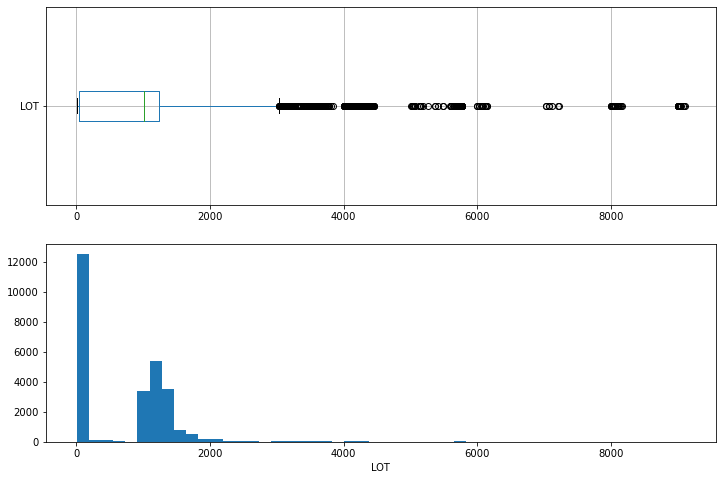

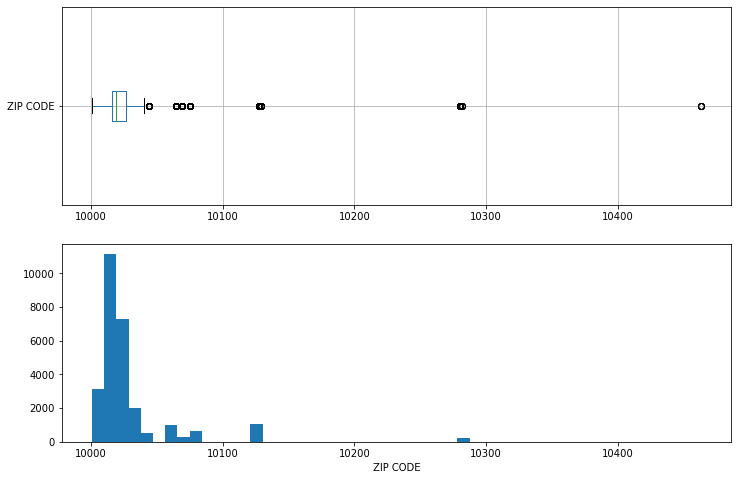

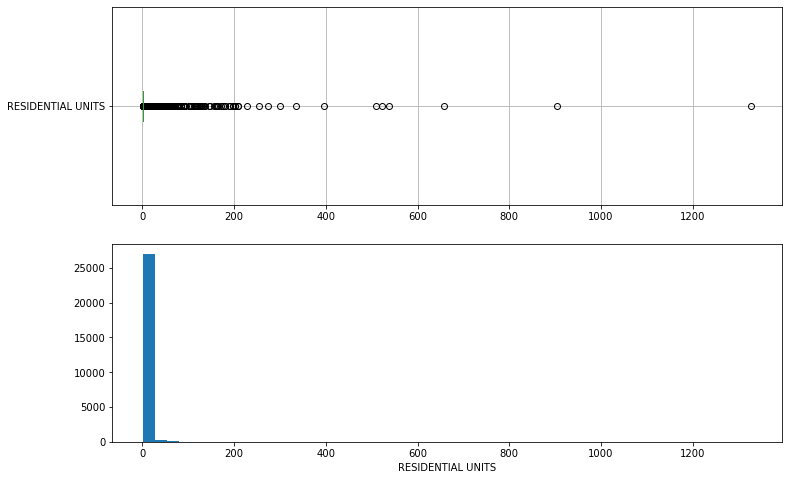

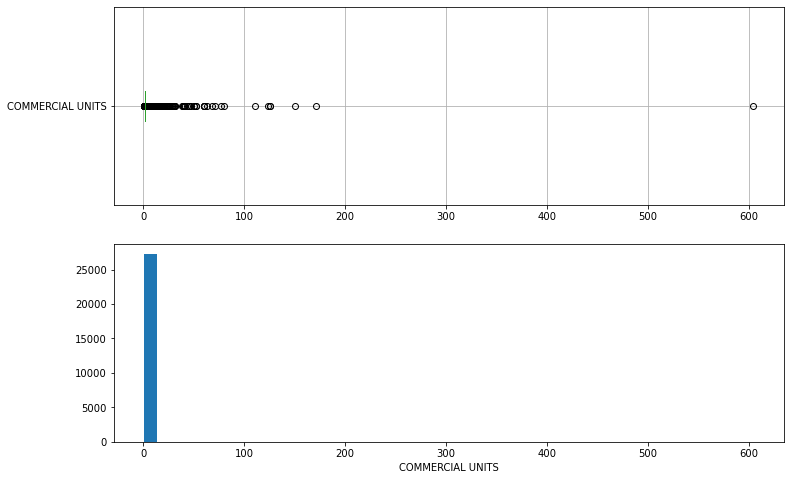

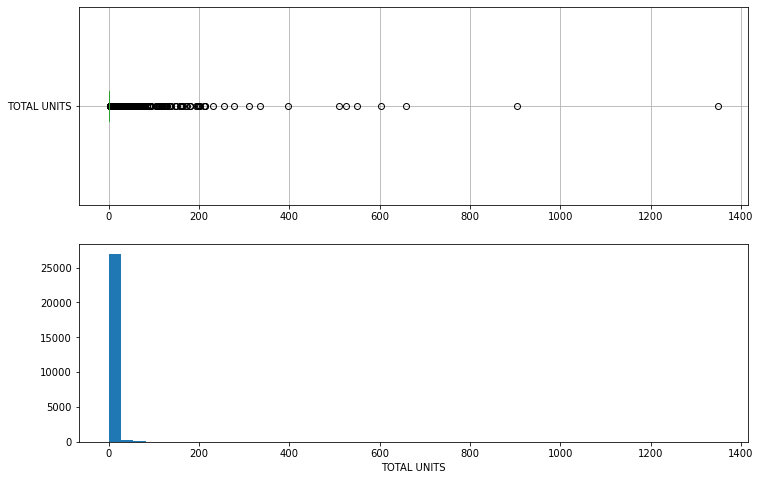

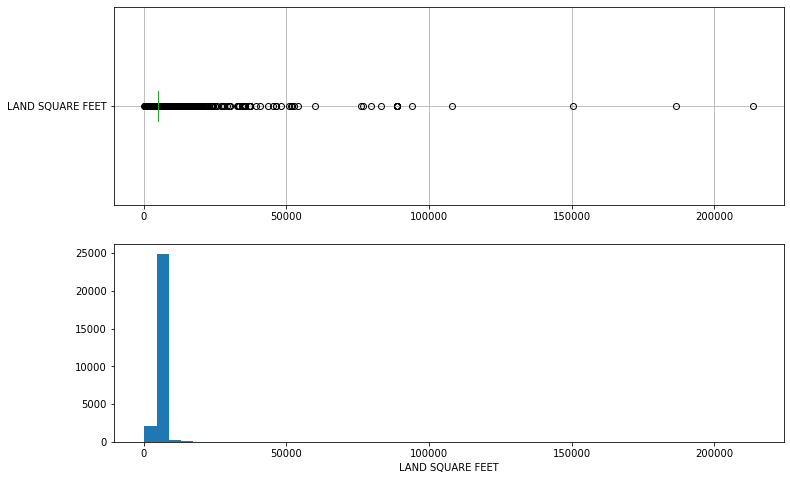

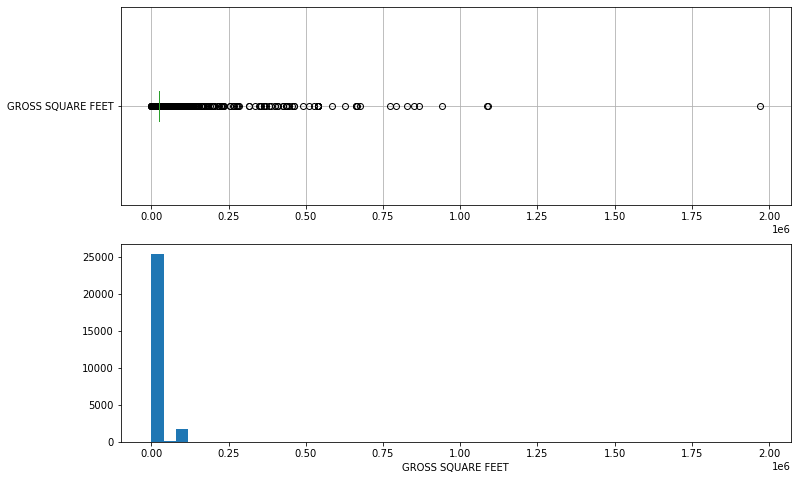

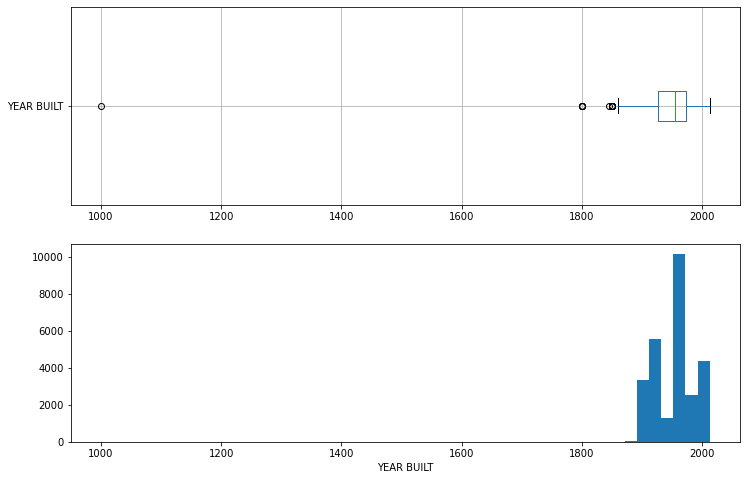

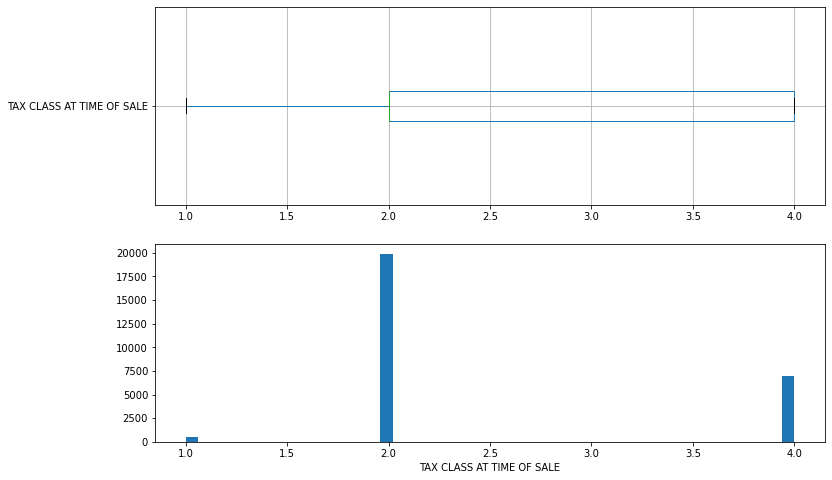

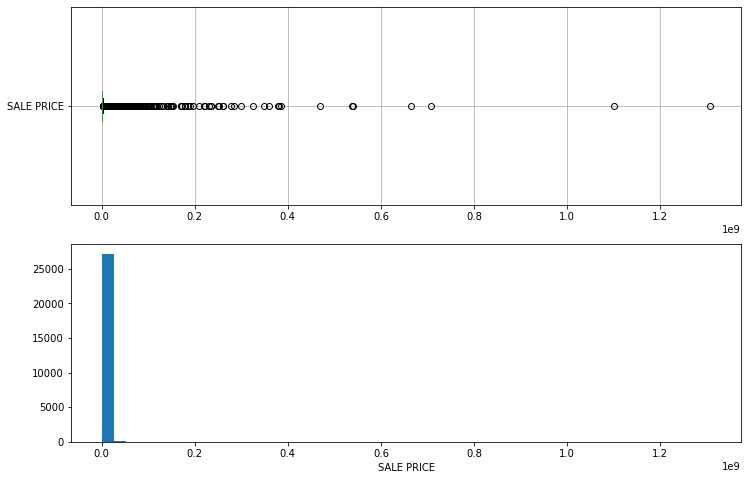

In [375]:
# Calling the plotstats function
for col in numeric:
    plotstats(df,col)


In [376]:
# defining outliers function
def outliers(df):
   
    numeric = df.select_dtypes("number").columns.tolist()
    for ft in numeric:
    
        # calculating the lower bound
        q25 = df[ft].quantile(0.25)
        # calculating the upper bound
        q75 = df[ft].quantile(0.75)
        # getting the inter quartile range
        intr_quartile = q75-q25

        # getting the maximum value using the 2 * IQR
        max= q75+(3*intr_quartile)
        # getting the minimum value using the 2 * IQR
        min= q25-(3*intr_quartile)

        # getting the index of outlier from a dataframe
        df[(df[ft]<min) | (df[ft]>max)] = df[ft].median()

    # return the index
    return df

In [377]:
# calling the outliers function
df_cleaned = outliers(df)

In [378]:
# showing the shape of df_cleaned dataset
df_cleaned.shape

(27395, 18)

In [379]:
# showing the missing values of df_cleaned dataset
df_cleaned.isnull().sum()

NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE DATE                         0
SALE PRICE                        0
dtype: int64

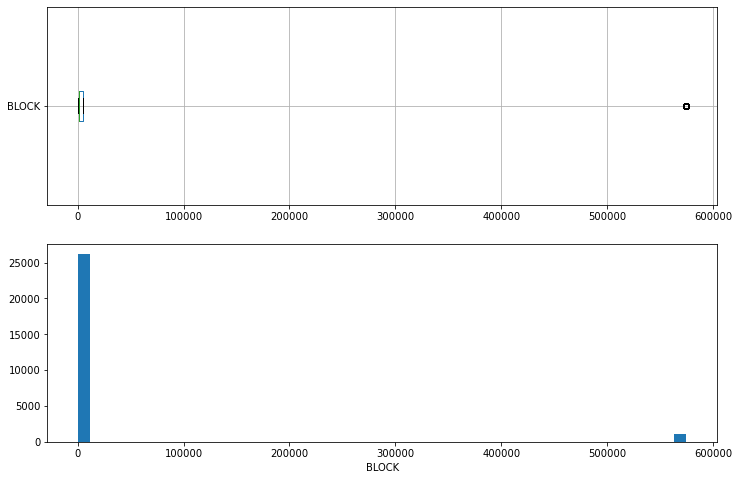

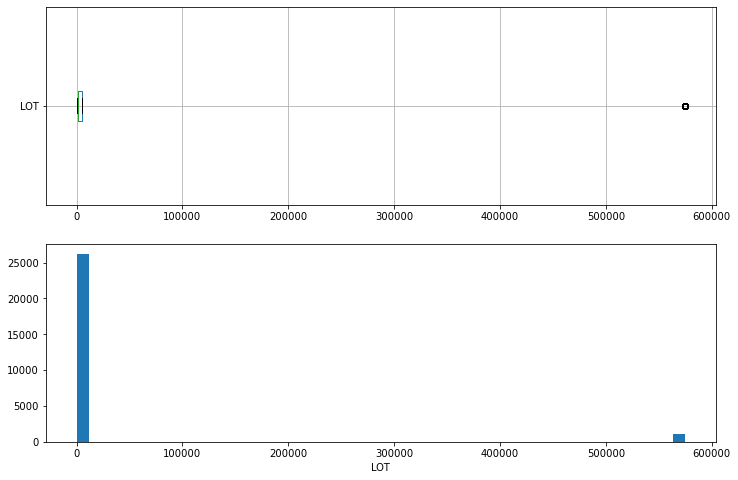

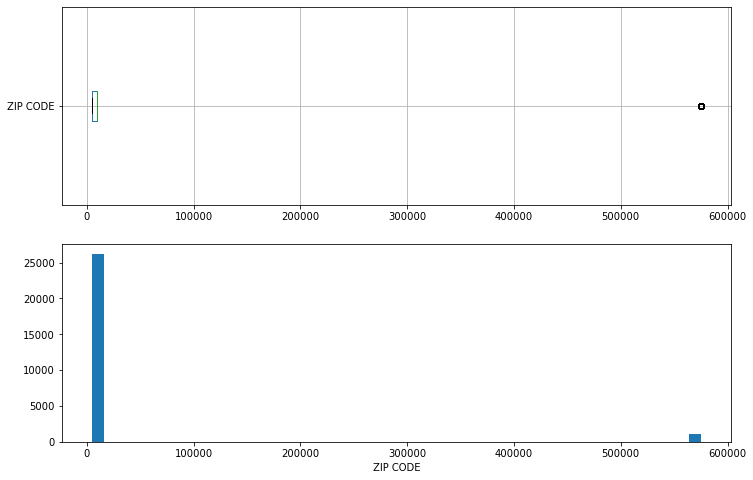

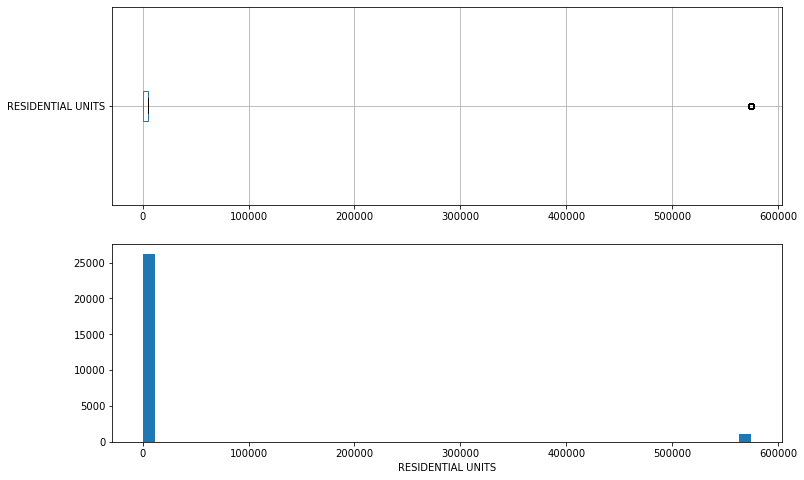

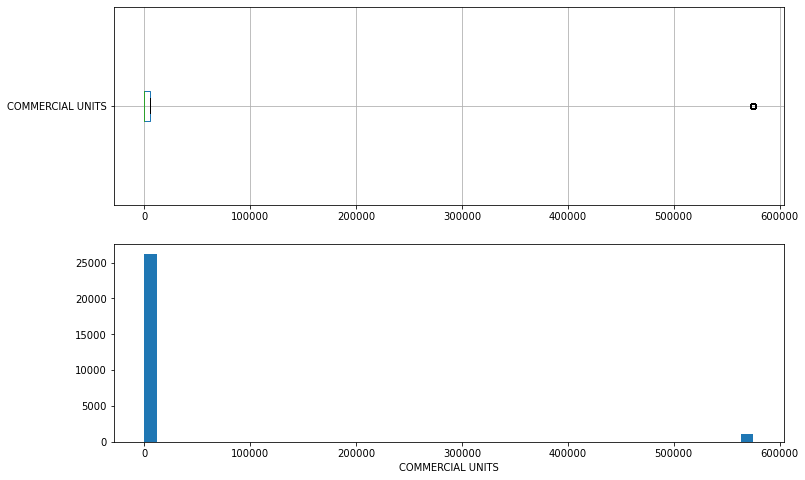

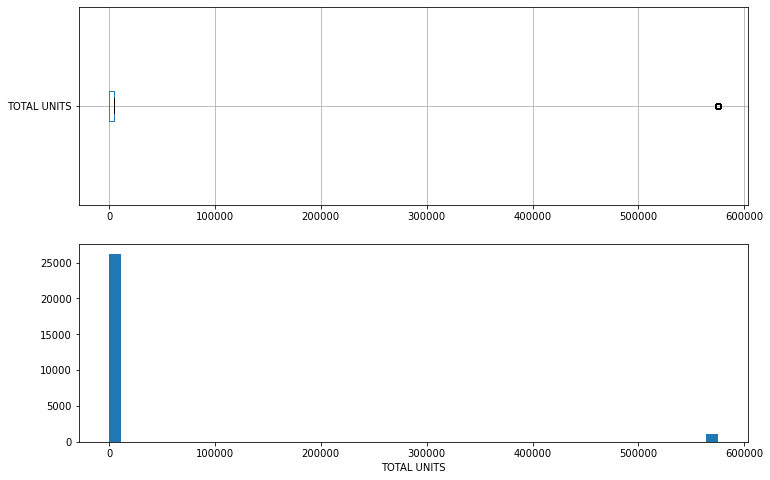

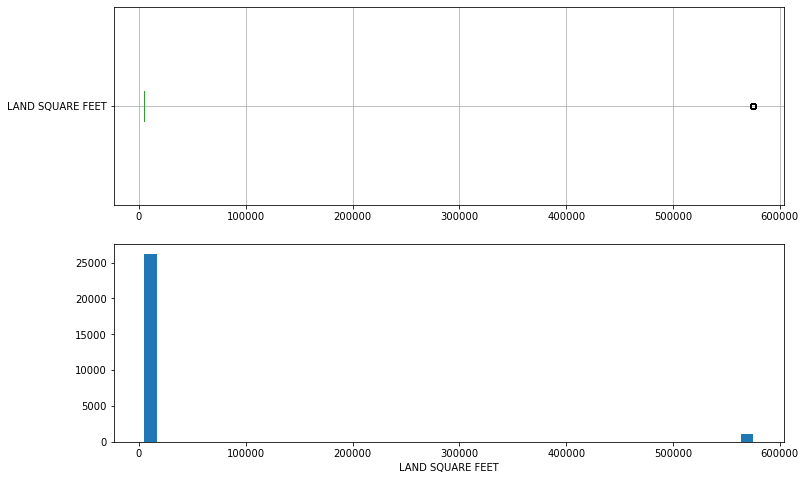

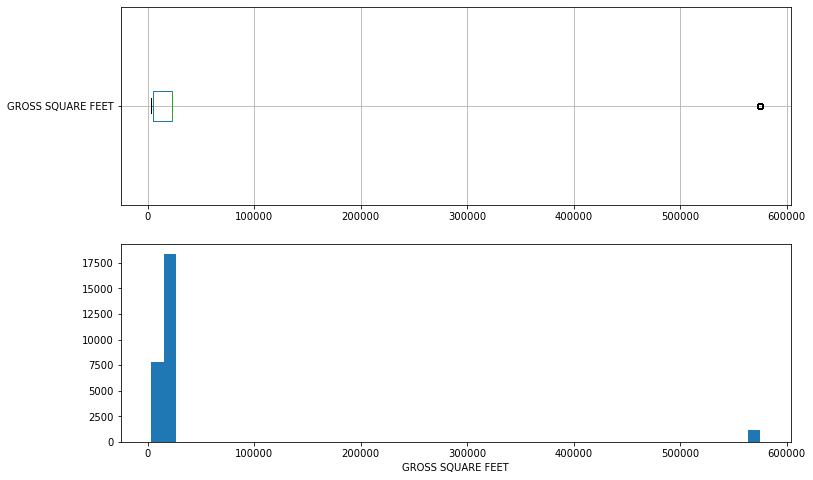

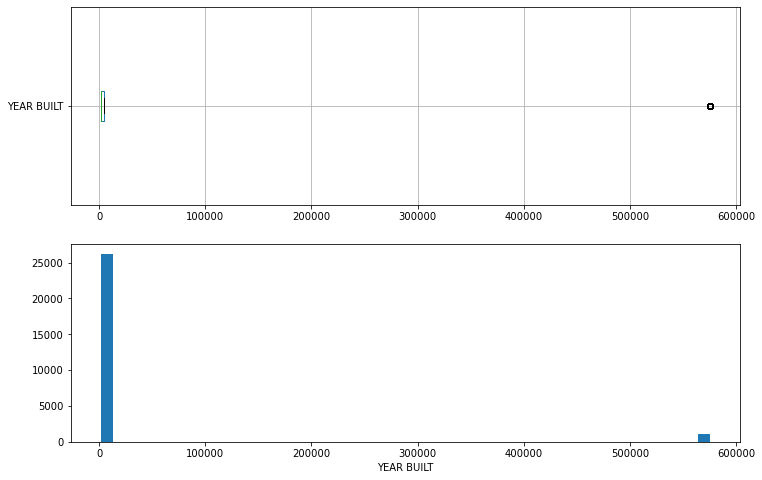

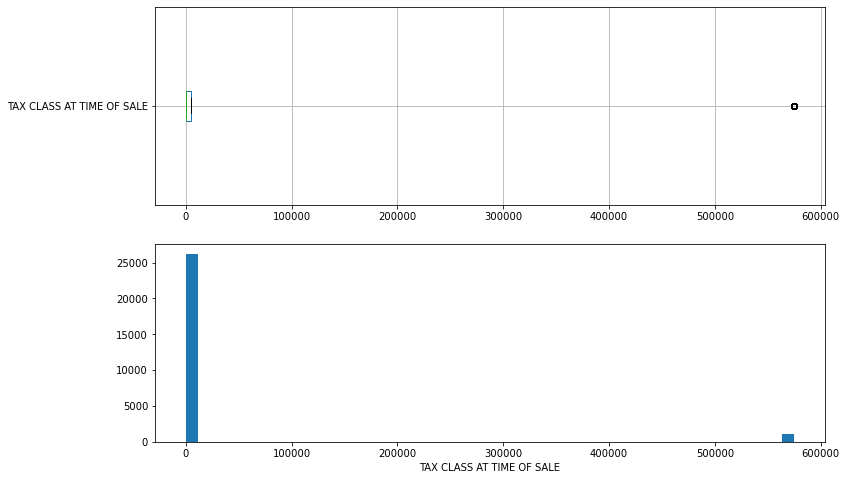

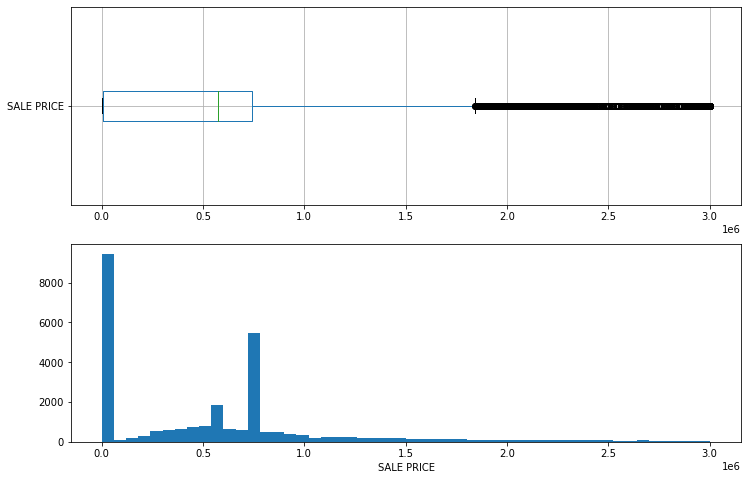

In [380]:
# checking outliers
for col in numeric:
    plotstats(df_cleaned,col)

In [381]:
# showing the shape of df_cleaned dataset
df_cleaned.shape

(27395, 18)

In [382]:
# showing the 5 rows from df_cleaned dataset
df_cleaned.head()

NEIGHBORHOOD           BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0  MIDTOWN WEST  13  CONDOS - ELEVATOR APARTMENTS                    2  738.0   
1  MIDTOWN WEST  13  CONDOS - ELEVATOR APARTMENTS                    2  738.0   
2  MIDTOWN WEST  13  CONDOS - ELEVATOR APARTMENTS                    2  738.0   
3  MIDTOWN WEST  13  CONDOS - ELEVATOR APARTMENTS                    2  738.0   
4  MIDTOWN WEST  13  CONDOS - ELEVATOR APARTMENTS                    2  738.0   

      LOT BUILDING CLASS AT PRESENT                 ADDRESS  ZIP CODE  \
0  1306.0                        R4  345 WEST 14TH   STREET   10014.0   
1  1307.0                        R4  345 WEST 14TH   STREET   10014.0   
2  1308.0                        R4  345 WEST 14TH   STREET   10014.0   
3  1309.0                        R4  345 WEST 14TH   STREET   10014.0   
4  1310.0                        R4  345 WEST 14TH   STREET   10014.0   

   RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
0                1.0               2.0          1.0            5046.0   
1                1.0               2.0          1.0            5046.0   
2                1.0               2.0          1.0            5046.0   
3                1.0               2.0          1.0            5046.0   
4                1.0               2.0          1.0            5046.0   

   GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE  \
0            23371.5      1955.0                        2.0   
1            23371.5      1955.0                        2.0   
2            23371.5      1955.0                        2.0   
3            23371.5      1955.0                        2.0   
4            23371.5      1955.0                        2.0   

  BUILDING CLASS AT TIME OF SALE            SALE DATE  SALE PRICE  
0                             R4  2013-05-20 00:00:00   2214693.0  
1                             R4  2013-05-16 00:00:00   1654656.0  
2                             R4  2013-05-23 00:00:00   1069162.0  
3                             R4  2013-05-15 00:00:00   1374637.0  
4                             R4  2013-05-13 00:00:00   1649565.0

In [383]:
# splitting the dataset into train and test data
df_train, df_test = train_test_split(df_cleaned, test_size=0.3)
print("Training size: {}, Testing size: {}".format(len(df_train),
len(df_test)))
print("Samples: {} Features: {}".format(*df_train.shape))

Training size: 19176, Testing size: 8219
Samples: 19176 Features: 18


In [384]:
# selecting the number columns from df_cleaned dataset
df1 = df_cleaned.select_dtypes(include=[np.number]).copy()
# converting the column values to list
feature_cols = df1.columns.values.tolist()
# removing the target variable
feature_cols.remove('SALE PRICE')
# assigning the feature_cols to XO
XO = df1[feature_cols]
# assigning the 'SALE PRICE' to YO
YO = df1['SALE PRICE']
estimator = svm.SVR(kernel="linear")
selector = feature_selection.RFE(estimator, 10,step=1)
selector = selector.fit(XO, YO)
# From the ranking you can select your predictors with rank 1
# Model 1; let us select the folowing features as predictors:
select_features = np.array(feature_cols)[selector.ranking_ == 1].tolist()
print(select_features)
X = df1[select_features]
Y = df1['SALE PRICE']
# splitting the dataset into train and test
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2)
lm = linear_model.LinearRegression()
lm.fit(trainX, trainY)
# Inspect the calculated model equations
print("Y-axis intercept {:6.4f}".format(lm.intercept_))
print("Weight coefficients:")
for feat, coef in zip(select_features, lm.coef_):
    print(" {:>20}: {:6.4f}".format(feat, coef))
# The value of R^2
print("R squared for the training data is {:4.3f}".format(lm.score(trainX,
trainY)))
print("Score against test data: {:4.3f}".format(lm.score(testX, testY)))

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


['BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE']
Y-axis intercept 5.6790
Weight coefficients:
                BLOCK: -178.7905
                  LOT: 106.3127
             ZIP CODE: -1396.9670
    RESIDENTIAL UNITS: 91540122655.5479
     COMMERCIAL UNITS: -183116626484.4042
          TOTAL UNITS: 91540459291.5628
     LAND SQUARE FEET: 36299409.6451
    GROSS SQUARE FEET: 23.9335
           YEAR BUILT: 416.8783
 TAX CLASS AT TIME OF SALE: -253842.7189
R squared for the training data is 0.444
Score against test data: 0.447


In [385]:
# evaluate the mean squared error
def mse(df, pred, obs):
    n = df.shape[0]
    return sum((df[pred]-df[obs])**2)/n
df1['pred'] = lm.predict(X)
print("Mean Squared error: {}".format(mse(df1,'pred', 'SALE PRICE')))

Mean Squared error: 196638814459.23495


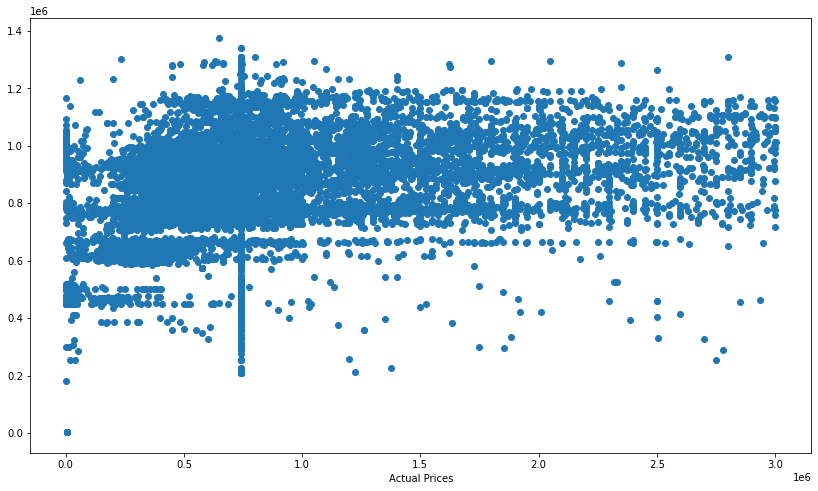

In [386]:
# predict the value of trainY using predict()
pred_trainY = lm.predict(trainX)
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)
plt.plot(trainY, pred_trainY, 'o')
plt.plot(range(int(data_norm['log-SALE PRICE'].max())),range(int(data_norm['log-SALE PRICE'].max())), color='green')
plb.xlabel('Actual Prices')
plt.ylabel='Predicted Prices'
plt.title='Plot of predicted vs actual prices'
plt.show()

In [387]:
# Evaluating the model using KFold cross validation
crossvalidation = KFold(10, shuffle=True, random_state=0)
score1=cross_val_score(lm, X, Y,scoring='neg_mean_squared_error',cv=crossvalidation,n_jobs=-1)
print("X valiation score for Linear regression is: {:5.4f}".format(np.mean(np.abs(score1)))+ ", STD: " + str(np.std(score1)))

X valiation score for Linear regression is: 196786405294.9843, STD: 11052175759.130959


# 2.2 Clustering

## K-Means Algorithm

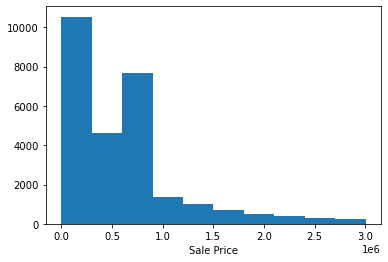

In [388]:
# showing the 'SALE PRICE' values using Hist plot
plt.hist(df['SALE PRICE'],bins=10, rwidth=10.0)
plt.xlabel('Sale Price') 
plt.title='Sale Price'
plt.show()

## Mean of Sale Price

In [389]:
# means of 'sale price'
df.groupby('SALE PRICE').mean()

BLOCK          LOT      ZIP CODE  RESIDENTIAL UNITS  \
SALE PRICE                                                              
1.0         1020.263158  1028.000000  10017.473684                1.0   
5.0         1027.000000  1275.500000  10019.000000                1.0   
7.0         1027.000000  1327.000000  10019.000000                1.0   
10.0        1076.276596  1264.117021  10018.968085                1.0   
25.0         475.000000     7.000000  10013.000000                1.0   
...                 ...          ...           ...                ...   
2990000.0    459.000000  1109.000000  10003.000000                1.0   
2995000.0    935.615385   850.384615  10017.692308                1.0   
2998746.0    217.000000  1213.000000  10013.000000                1.0   
3000000.0    874.750000   865.687500  10013.500000                1.0   
3003837.0   1226.500000  1084.000000  10023.500000                1.0   

            COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
SALE PRICE                                                    
1.0                      2.0          1.0            5046.0   
5.0                      2.0          1.0            5046.0   
7.0                      2.0          1.0            5046.0   
10.0                     2.0          1.0            5046.0   
25.0                     2.0          1.0            5046.0   
...                      ...          ...               ...   
2990000.0                2.0          1.0            5046.0   
2995000.0                2.0          1.0            5046.0   
2998746.0                2.0          1.0            5046.0   
3000000.0                2.0          1.0            5046.0   
3003837.0                2.0          1.0            5046.0   

            GROSS SQUARE FEET   YEAR BUILT  TAX CLASS AT TIME OF SALE  
SALE PRICE                                                             
1.0                   23371.5  1949.105263                   2.315789  
5.0                   23371.5  1955.000000                   4.000000  
7.0                   23371.5  1955.000000                   4.000000  
10.0                  23371.5  1960.755319                   2.765957  
25.0                  23371.5  1900.000000                   2.000000  
...                       ...          ...                        ...  
2990000.0             23371.5  2007.000000                   2.000000  
2995000.0             23371.5  1960.846154                   2.000000  
2998746.0             23371.5  1906.000000                   2.000000  
3000000.0             23371.5  1956.500000                   2.000000  
3003837.0             23371.5  2009.000000                   2.000000  

[3190 rows x 10 columns]

## Scatter plot of Gross Square Feet Vs Sale Price  

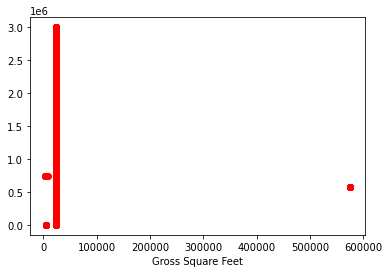

In [390]:
# plot the 'GROSS SQUARE FEET Vs SALE PRICE'
plt.plot(df['GROSS SQUARE FEET'], df['SALE PRICE'],'ro')
plt.title='Gross Square Feet vs Sale Price'
plt.xlabel('Gross Square Feet') 
plt.ylabel='Sale Price'
plt.show()

## Normalisation

In [391]:
# selecting the numeric columns
num_cols = df.select_dtypes(include=[np.number]).copy()
df_norm=((num_cols-num_cols.min())/(num_cols.max()-num_cols.min()))
#print ('raw data', df.head(2))
df_norm.head(5)

BLOCK       LOT  ZIP CODE  RESIDENTIAL UNITS  COMMERCIAL UNITS  \
0  0.001264  0.002270  0.008716                0.0               0.0   
1  0.001264  0.002271  0.008716                0.0               0.0   
2  0.001264  0.002273  0.008716                0.0               0.0   
3  0.001264  0.002275  0.008716                0.0               0.0   
4  0.001264  0.002277  0.008716                0.0               0.0   

   TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  YEAR BUILT  \
0          0.0               0.0           0.034565     0.00027   
1          0.0               0.0           0.034565     0.00027   
2          0.0               0.0           0.034565     0.00027   
3          0.0               0.0           0.034565     0.00027   
4          0.0               0.0           0.034565     0.00027   

   TAX CLASS AT TIME OF SALE  SALE PRICE  
0                   0.000002    0.737288  
1                   0.000002    0.550847  
2                   0.000002    0.355932  
3                   0.000002    0.457627  
4                   0.000002    0.549152

In [392]:
#########
## call KMeans algo with 6 clusters
model = KMeans(n_clusters=6)
model.fit(df_norm)
## J score
print('Cost = ', model.inertia_)
#print(' score = ', model.score(df_norm))
## include the labels into the data
print(model.labels_)

Cost =  43.91004584579002
[5 2 4 ... 3 3 3]


In [393]:
#getting the labels
labels = model.labels_
md = pd.Series(labels)
df_norm['clust'] = md
df_norm.head(5)

BLOCK       LOT  ZIP CODE  RESIDENTIAL UNITS  COMMERCIAL UNITS  \
0  0.001264  0.002270  0.008716                0.0               0.0   
1  0.001264  0.002271  0.008716                0.0               0.0   
2  0.001264  0.002273  0.008716                0.0               0.0   
3  0.001264  0.002275  0.008716                0.0               0.0   
4  0.001264  0.002277  0.008716                0.0               0.0   

   TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  YEAR BUILT  \
0          0.0               0.0           0.034565     0.00027   
1          0.0               0.0           0.034565     0.00027   
2          0.0               0.0           0.034565     0.00027   
3          0.0               0.0           0.034565     0.00027   
4          0.0               0.0           0.034565     0.00027   

   TAX CLASS AT TIME OF SALE  SALE PRICE  clust  
0                   0.000002    0.737288      5  
1                   0.000002    0.550847      2  
2                   0.000002    0.355932      4  
3                   0.000002    0.457627      2  
4                   0.000002    0.549152      2

In [394]:
# summary of missing values
df_norm.isnull().sum()

BLOCK                        0
LOT                          0
ZIP CODE                     0
RESIDENTIAL UNITS            0
COMMERCIAL UNITS             0
TOTAL UNITS                  0
LAND SQUARE FEET             0
GROSS SQUARE FEET            0
YEAR BUILT                   0
TAX CLASS AT TIME OF SALE    0
SALE PRICE                   0
clust                        0
dtype: int64

In [395]:
## cluster centers 
centroids = model.cluster_centers_
print ('centroids', centroids)

centroids [[ 2.06679003e-03  7.52382083e-04  8.72705524e-03  9.71445147e-17
   7.63278329e-17  9.71445147e-17  1.94289029e-16  3.45646840e-02
   2.55892191e-04  1.82005234e-06  1.41872955e-01]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.91421569e-01]
 [ 1.73244631e-03  1.31288752e-03  8.72347588e-03 -1.94289029e-16
  -1.45716772e-16 -1.94289029e-16  1.38777878e-16  3.45646840e-02
   2.68853971e-04  1.79667553e-06  4.95097244e-01]
 [ 7.35669619e-03  7.38262348e-03  1.78736819e-03  6.97693375e-03
   6.97556294e-03  6.97693375e-03 -6.73072709e-16  9.06100481e-03
   4.55676338e-03  6.97783359e-03  4.11607079e-03]
 [ 1.80350011e-03  1.66508818e-03  8.72518195e-03  6.10622664e-16
   0.00000000e+00  6.10622664e-16 -2.84494650e-16  3.45397375e-02
   2.73636461e-04  2.62827879e-06  2.57642715e-01]
 [ 1.58209490e-03  1.50505106e-03  8.72139839e-03 -6.24500451e-17
  -2.0816

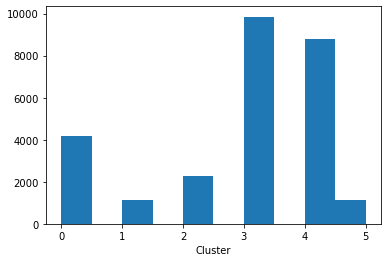

In [396]:
## histogram of the clusters
plt.hist(df_norm['clust'])
plt.title='Histogram of Clusters'
plt.xlabel('Cluster')
plt.ylabel='Frequency'
plt.show()

In [397]:
## means of the clusters
#print ('clustered data', df_norm)
df_norm.groupby('clust').mean()

BLOCK       LOT  ZIP CODE  RESIDENTIAL UNITS  COMMERCIAL UNITS  \
clust                                                                      
0      0.002067  0.000752  0.008727           0.000000          0.000000   
1      1.000000  1.000000  1.000000           1.000000          1.000000   
2      0.001732  0.001313  0.008723           0.000000          0.000000   
3      0.007357  0.007383  0.001787           0.006977          0.006976   
4      0.001804  0.001665  0.008725           0.000000          0.000000   
5      0.001582  0.001505  0.008721           0.000000          0.000000   

       TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  YEAR BUILT  \
clust                                                                 
0         0.000000               0.0           0.034565    0.000256   
1         1.000000               1.0           1.000000    1.000000   
2         0.000000               0.0           0.034565    0.000269   
3         0.006977               0.0           0.009061    0.004557   
4         0.000000               0.0           0.034540    0.000274   
5         0.000000               0.0           0.034565    0.000270   

       TAX CLASS AT TIME OF SALE  SALE PRICE  
clust                                         
0                       0.000002    0.141859  
1                       1.000000    0.191422  
2                       0.000002    0.495097  
3                       0.006978    0.004116  
4                       0.000003    0.257636  
5                       0.000002    0.809231

In [398]:
# shape of df_norm
df_norm.shape

(27395, 12)

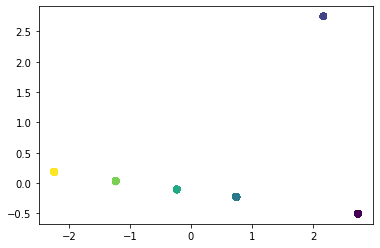

In [399]:
######## 2D plot of the clusters
pca_data = PCA(n_components=2).fit(df_norm)
pca_2d = pca_data.transform(df_norm)
plt.scatter(pca_2d[:,0], pca_2d[:,1], c=labels)
plt.title='Sale Price clusters'
plt.show()


Plotting elbow method...
2 22954.250365761174
4 3655.3286247099313
6 43.91004466311838
8 25.15171541651811
10 13.598831978366881
12 9.04862875981742
14 6.4179863369977355
16 4.9609857860077575
18 3.5680937726772077


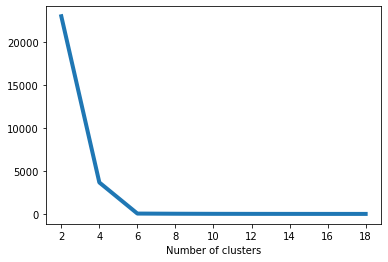

DONE


In [400]:
# Defining the elbow method
def elbow(data):
    print("\nPlotting elbow method...")
    sse = {}
    for k in range(2, 20, 2):
        kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
        print(k, kmeans.inertia_)
        sse[k] = kmeans.inertia_  
        # Inertia: Sum of distances of samples to their closest cluster center
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()), linewidth=4)
    plt.xlabel("Number of clusters")
    plt.ylabel="Data points"
    plt.show()
    print("DONE")
elbow(df_norm)

In [401]:
# showing the datatypes
df_norm.dtypes

BLOCK                        float64
LOT                          float64
ZIP CODE                     float64
RESIDENTIAL UNITS            float64
COMMERCIAL UNITS             float64
TOTAL UNITS                  float64
LAND SQUARE FEET             float64
GROSS SQUARE FEET            float64
YEAR BUILT                   float64
TAX CLASS AT TIME OF SALE    float64
SALE PRICE                   float64
clust                          int32
dtype: object

# 2.3 Build Local Regressor 

In [402]:
# Build SVR model on clusters
df1 = df_norm.select_dtypes(include=[np.number]).copy()
feature_cols = df1.columns.values.tolist()
XO = df1[feature_cols]
YO = df1['SALE PRICE']
estimator = svm.SVR(kernel="linear")
selector = feature_selection.RFE(estimator, 12,step=1)
selector = selector.fit(XO, YO)
# From the ranking you can select your predictors with rank 1
# Model 1; let us select the folowing features as predictors:
select_features = np.array(feature_cols)[selector.ranking_ == 1].tolist()
print(select_features)
X = df1[select_features]
Y = df1['SALE PRICE']
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2)

['BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'SALE PRICE', 'clust']


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=12 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [403]:
# Build KMeans model on clusters
model = KMeans(n_clusters = 6)
pred = model.fit_predict(trainX)
y_test_pred = model.fit_predict(testX)

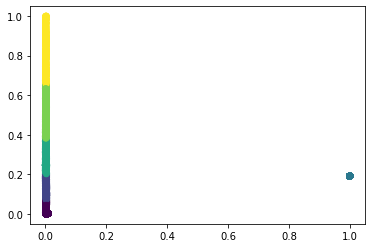

In [404]:
# plot the scatter graph for local regressors
plt.scatter(testX.iloc[:,0],testX.iloc[:,10], c = y_test_pred)
plt.show()